# Encoding Model (GLMs) for population activity as a function of sensory and behavioral variables

In [1]:
# importing modules and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io_utils import *
from plotting_utils import *
from analysis_utils import * 
from pathlib import Path
import pickle
import scipy
import seaborn as sns
sns.set_context("talk")

In [2]:
# with open('../data/fully_labeled_traces_041824_nonznorm.pickle', 'rb') as handle:
#     dict = pickle.load(handle)
# print(dict.keys())

# Deleted file from SSD disk for space

In [3]:
animalsAgg = ['29L','3095','3096','3097','30B','30L','30R2','4013','4014','4015','4016','91R2'] # list of all aniamls
# days = ['d1_balbc','d2_balbc','d3_balbc','d4_balbc','d5_balbc','d6_balbc','d7_balbc','d8_balbc','d9_mCD1'] # list of all days
animalsObs = ['29L','30R2','86L', '87L2'] # list of observer animals
# daysObs = ['d1_obs','d2_obs','d3_obs','d4_obsc','d5_obs','d6_obs','d7_obs','d8_obs','d9_OBSmCD1'] # list of all days for observer group
animalsToy = ['86L2', '87B', '87L','87R2']
# daysToy = []
# sessions = ['t1','t2','t3'] # session in each day
animalsAll = animalsAgg + animalsObs + animalsToy

maxRegions = ['PrL (E)', 'PrL (I)', 'vLS (E)', 'vLS (I)', 'POA (E)', 'POA (I)', 'BNST (E)', 'BNST (I)', 'AH (E)', 'AH (I)', 'MeA (E)', 'MeA (I)', 'VMH (E)', 'VMH (I)', 'PAG (E)', 'PMv (E)', 'PMv (I)', 'LHb (E)', 'LHb (I)', 'PA (E)', 'PA (I)', 'NAc (DA)']

In [4]:
# with open('../data/29L_d1_balbc_t1_zscored_features.pickle', 'rb') as handle: # from cup folder 020924
#     dict = pickle.load(handle)
# df = pd.DataFrame(dict)
# df.head()
z = pd.read_parquet('../data/processed_features_020924_parquets/3095_d1_balbc_t1_zscored_features.parquet')
z.head()

# CHECK WITH JORGE THAT FPS=40

resident tti2head  resident tti2trunk  resident tti2neck  \
0           2.113413            1.614619           2.058559   
1           2.115208            1.615705           2.060196   
2           2.118729            1.617847           2.063406   
3           2.123840            1.620985           2.068067   
4           2.130342            1.625035           2.074002   

   resident tti2centroid  resident head2nose  resident trunk2head  \
0               2.603204           -0.178948             2.569558   
1               2.603248           -0.177038             2.569362   
2               2.603290           -0.173242             2.568899   
3               2.603236           -0.167606             2.568027   
4               2.602955           -0.160195             2.566545   

   resident forepaw left2head  resident forepaw right2head  \
0                    1.727065                     1.579520   
1                    1.723661                     1.578406   
2                    1.716860                     1.576147   
3                    1.706681                     1.572685   
4                    1.693149                     1.567937   

   resident forepaw left2trunk  resident forepaw right2trunk  ...  \
0                     0.617982                     -0.584120  ...   
1                     0.618196                     -0.582164  ...   
2                     0.618632                     -0.578295  ...   
3                     0.619306                     -0.572599  ...   
4                     0.620245                     -0.565198  ...   

   resident2intruder nose-centroid mean across lags  \
0                                         -1.338892   
1                                         -1.338647   
2                                         -1.338159   
3                                         -1.337433   
4                                         -1.336476   

   resident2intruder nose-centroid median across lags  \
0                                          -1.207235    
1                                          -1.206490    
2                                          -1.205012    
3                                          -1.202831    
4                                          -1.199987    

   resident2intruder nose-centroid sum across lags  \
0                                        -1.338892   
1                                        -1.338647   
2                                        -1.338159   
3                                        -1.337433   
4                                        -1.336476   

   intruder2resident nose-centroid mean across lags  \
0                                         -1.137748   
1                                         -1.137235   
2                                         -1.136214   
3                                         -1.134694   
4                                         -1.132690   

   intruder2resident nose-centroid median across lags  \
0                                          -0.974535    
1                                          -0.972901    
2                                          -0.969670    
3                                          -0.964912    
4                                          -0.958728    

   intruder2resident nose-centroid sum across lags  \
0                                        -1.137748   
1                                        -1.137235   
2                                        -1.136214   
3                                        -1.134694   
4                                        -1.132690   

   intruder2resident nose-tti mean across lags  \
0                                    -1.184827   
1                                    -1.184122   
2                                    -1.182719   
3                                    -1.180631   
4                                    -1.177879   

   intruder2resident nose-tti median across lags  \
0                                      -1.104307   
1                 

In [5]:
animal = '87R2'
group = 'toy'
df = load_and_wrangle(mouseId=animal, group=group, path=None, overwrite=False) # load csv for animal
df.head()

subject group other day trial   PrL (E)   PrL (I)   vLS (E)   vLS (I)  \
0    87R2   toy   toy  d1    t1 -1.063395  0.909251  1.871373  2.244736   
1    87R2   toy   toy  d1    t1 -1.027535  0.905886  1.989819  2.226864   
2    87R2   toy   toy  d1    t1 -1.008239  0.887971  2.075432  2.212358   
3    87R2   toy   toy  d1    t1 -1.003195  0.857523  2.132552  2.200866   
4    87R2   toy   toy  d1    t1 -1.010088  0.816558  2.165517  2.192036   

    POA (E)  ...   PAG (E)   PMv (E)   PMv (I)   LHb (E)   LHb (I)    PA (E)  \
0 -0.404598  ...  2.005657  0.200521  0.359716 -0.820301  1.242436 -0.000516   
1 -0.242623  ...  1.647102  0.116451  0.624592 -0.823274  1.317966 -0.037125   
2 -0.109970  ...  1.367473  0.055781  0.841978 -0.824143  1.376043 -0.070260   
3 -0.004372  ...  1.160417  0.016299  1.015863 -0.823001  1.418316 -0.100079   
4  0.076436  ...  1.019582 -0.004208  1.150232 -0.819943  1.446435 -0.126740   

     PA (I)  NAc (DA)  unsupervised labels  attack labels  
0  2.151475  0.426933                  9.0              0  
1  2.062713  0.527569                  9.0              0  
2  1.981272  0.620729                  9.0              0  
3  1.906742  0.707320                  9.0              0  
4  1.838714  0.788250                  9.0              0  

[5 rows x 29 columns]

In [6]:
# !!! angles only go to 180 so no circular features for now 
featuresShortlist = ["proximity","resident centroid roc 500 ms", "intruder centroid roc 500 ms",'resident2intruder head-head', 'resident2intruder head-tti','resident2intruder head2head angle', 'resident2intruder head2tti angle', "intruder2resident head2centroid angle"]
circularShortlist = [0, 0, 0, 0, 0, 0, 0, 0] 
featuresLonglist = ["proximity","resident centroid roc 500 ms", "intruder centroid roc 500 ms", 'resident2intruder head-head', 'resident2intruder head-tti','resident2intruder head2head angle', 'resident2intruder head2tti angle', "intruder2resident head2centroid angle",
   "resident tti2head", "intruder tti2head", "resident tailbase2head angle", "intruder tailbase2head angle"] # potentially add more
circularLonglist = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [7]:
# # histogram_feature(animal, features=featuresShortlist, path=None)



# create neural data sets
# for animal in animalsAgg:
#     df = load_and_wrangle(animal, group='agg', path=None, overwrite=True)

# for animal in animalsObs:
#     df = load_and_wrangle(animal, group='obs', path=None, overwrite=True)

# for animal in animalsToy:
#     df = load_and_wrangle(animal, group='toy', path=None, overwrite=True)

In [14]:
regions = get_regions_dataframe(df) # get recorded regions from dataframe
print(regions)

['PrL (E)', 'PrL (I)', 'vLS (E)', 'vLS (I)', 'POA (E)', 'POA (I)', 'BNST (E)', 'BNST (I)', 'AH (E)', 'AH (I)', 'MeA (E)', 'MeA (I)', 'VMH (E)', 'VMH (I)', 'PAG (E)', 'PMv (E)', 'PMv (I)', 'LHb (E)', 'LHb (I)', 'PA (E)', 'PA (I)', 'NAc (DA)']


In [7]:
X_all, X, bin_centers = get_design_X_GLM_features(animal, group, features=[featuresShortlist[1]], Nbins=5)
region = 'POA (I)'
Y_all, Y = get_output_Y_GLM(animal, group, region, path=None)

print(X_all.shape)
print(Y_all.shape)

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed_features_020924_parquets/87R2_d1_toy_t1_zscored_features.parquet'

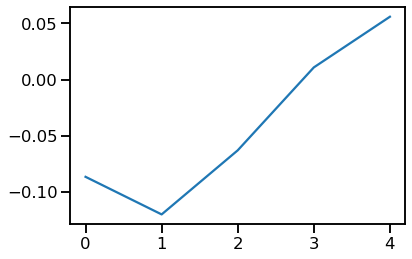

0.9998723504425132


In [10]:
w_hat = solution_linear_Gaussian_smoothing(X_all, Y_all, feature_start=[0, 1], circular=[0,0], alpha=10) # bias + one tuning curve
plt.plot(w_hat[1:])
plt.show()

print(mse(X_all, Y_all, w_hat))

# FITS FOR ALL DAYS TOGETHER

In [11]:
featuresInterest_index = [0,1,2,3,4,5] # out of all  indices in feature Shortlist

NameError: name 'colormap' is not defined

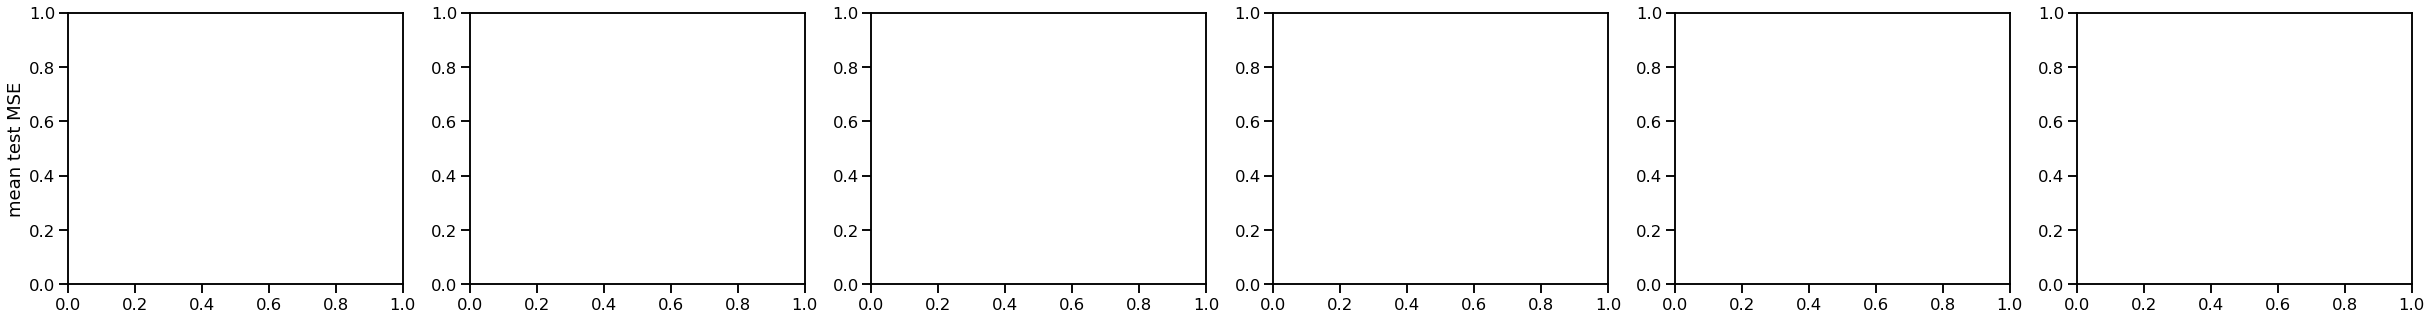

In [10]:
# MSE as a function of alpha for particular animal 

animal = '30R2'
group = 'obs'
df = load_and_wrangle(animal, group)
regions = get_regions_dataframe(df)

alpha_values = [10**x for x in np.arange(1,8.5,0.5)] 
Nbin_values = [20]
K = 5

for region in regions:
    fits = np.load(f'../data/{animal}/{animal}_{group}_KFold={K}_MAP-estimation_region={region}.npz', allow_pickle=True)
    W_map = fits['W_map']
    train_mse = fits['train_mse']
    test_mse = fits['test_mse']
    best_ind = fits['best_ind']
    r2_best = fits['r2_best']

    fig, axes = plt.subplots(nrows=1,ncols=len(featuresInterest_index), figsize=(7 * len(featuresInterest_index), 5))
    axes[0].set_ylabel('mean test MSE')

    for feature_ind in range(len(featuresInterest_index)): #range(len(featuresShortlist)):

        for Nbin_ind in range(len(Nbin_values)):
            axes[feature_ind].scatter(alpha_values[best_ind[feature_ind][1]], test_mse[feature_ind, best_ind[feature_ind][0], best_ind[feature_ind][1]], color=colormap[Nbin_ind])
            axes[feature_ind].plot(alpha_values, test_mse[feature_ind, Nbin_ind], label=f'test Nbin={Nbin_values[Nbin_ind]}', color=colormap[Nbin_ind])
            # axes[feature_ind].plot(alpha_values, train_mse_mean,  linestyle='dashed')
            axes[feature_ind].set_xlabel('alpha')
            axes[feature_ind].set_xscale('log')
            axes[feature_ind].legend()
            axes[feature_ind].set_title(featuresLonglist[featuresInterest_index[feature_ind]]) 

    fig.suptitle(str(region), size=25, y=1.02)
    plt.show()

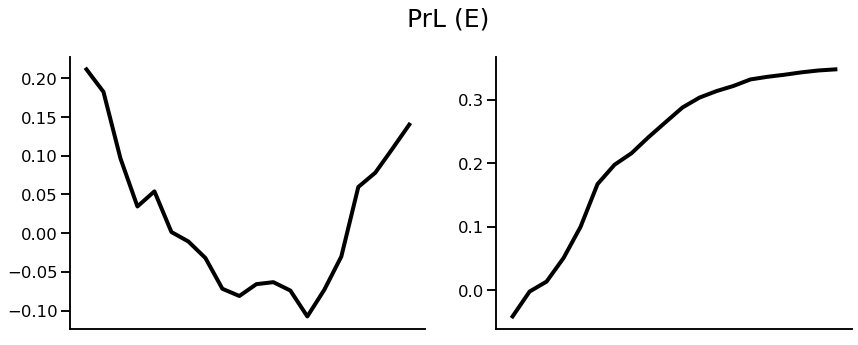

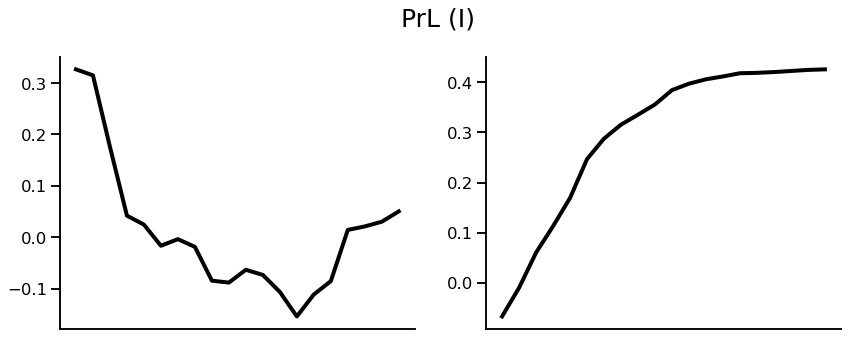

In [163]:
# Tuning Curves (weights) for particular animal

animal = '29L'
group = 'obs'
df = load_and_wrangle(animal, group)
regions = get_regions_dataframe(df)

alpha_values = [10**x for x in np.arange(1,8.5,0.5)] 
Nbin_values = [20]
K = 5

featuresInterest_index = [0,1]

for region in regions[0:2]:#regions:
    fits = np.load(f'../data/{animal}/{animal}_{group}_KFold={K}_MAP-estimation_region={region}.npz', allow_pickle=True)
    W_map = fits['W_map']
    train_mse = fits['train_mse']
    test_mse = fits['test_mse']
    best_ind = fits['best_ind']
    r2_best = fits['r2_best']

    fig, axes = plt.subplots(nrows=1,ncols=len(featuresInterest_index), figsize=(len(featuresInterest_index)*7,5))
    
    for feature_ind in featuresInterest_index: #range(len(featuresShortlist)):
        axes[feature_ind].plot(W_map[feature_ind,best_ind[feature_ind][0],best_ind[feature_ind][1]][1:], color='black', linewidth=4) #, color=colormap[feature_ind]) # without bias
        # axes[feature_ind].scatter(0, W_map_mean[0], color=colormap[feature_ind])
        # axes[feature_ind].set_xlabel('filter')
        # axes[feature_ind].set_title(f'r squared = ' + str(np.round(r2, 3)) + f', alpha = {alpha_values[best_ind[1]]}')
        axes[feature_ind].set_xticks([],[])
        axes[feature_ind].spines[['right', 'top']].set_visible(False)

    fig.suptitle(str(region), size=25, y=1.02)
    plt.show()


In [8]:
# Averaged across animals for aggression and observation group
K = 5
Nbin_values = [20]
Nbin_ind = 0
Nbin_total = Nbin_values[Nbin_ind] + 1

weightsAllAgg = np.ma.empty((len(animalsAgg), len(maxRegions), len(featuresLonglist), Nbin_total))
weightsAllAgg.mask = True
group = 'agg'
for animal_ind in range(len(animalsAgg)):
    animal = animalsAgg[animal_ind]
    df = load_and_wrangle(animal, group=group)
    regions = get_regions_dataframe(df)
    for region in regions:
        region_ind = maxRegions.index(region) # the index of the region in the list of all possible regions (maxRegions)
        
        fits = np.load(f'../data/{animal}/{animal}_{group}_KFold={K}_MAP-estimation_region={region}.npz', allow_pickle=True)
        W_map = fits['W_map']
        best_ind = fits['best_ind']
        # train_mse = fits['train_mse']
        # test_mse = fits['test_mse']
        # r2_best = fits['r2_best']

        for feature_ind in range(len(featuresLonglist)):
            weightsAllAgg[animal_ind, region_ind, feature_ind, :] = W_map[feature_ind,best_ind[feature_ind][0],best_ind[feature_ind][1]]

weightsAllObs = np.ma.empty((len(animalsObs), len(maxRegions), len(featuresLonglist), Nbin_total))
weightsAllObs.mask = True
group = 'obs'
for animal_ind in range(len(animalsObs)):
    animal = animalsObs[animal_ind]
    df = load_and_wrangle(animal, group=group)
    regions = get_regions_dataframe(df)
    for region in regions:
        region_ind = maxRegions.index(region) # the index of the region in the list of all possible regions (maxRegions)
        
        fits = np.load(f'../data/{animal}/{animal}_{group}_KFold={K}_MAP-estimation_region={region}.npz', allow_pickle=True)
        W_map = fits['W_map']
        best_ind = fits['best_ind']
        # train_mse = fits['train_mse']
        # test_mse = fits['test_mse']
        # r2_best = fits['r2_best']

        for feature_ind in range(len(featuresLonglist)):
            weightsAllObs[animal_ind, region_ind, feature_ind, :] = W_map[feature_ind,best_ind[feature_ind][0],best_ind[feature_ind][1]]



In [10]:
# PLOTTING TUNING CURVES FOR EACH REGION

# regionsInterest = [0,1,7,9,12,13,14,17,20,21]

# for region_ind in range(len(maxRegions)):

#     fig, axes = plt.subplots(nrows=1,ncols=len(featuresInterest_index), figsize=(len(featuresInterest_index)*7,5))

#     for feature_ind in featuresInterest_index:
#         axes[feature_ind].plot(weightsAllAgg[:, region_ind, feature_ind, 1:].mean(axis=0), label='agg', color='tab:red') 
#         # axes[feature_ind].plot(weightsAllObs[:, region_ind, feature_ind, 1:].mean(axis=0), label='obs', color='tab:blue') 
#         # axes[feature_ind].scatter(0, W_map_mean[0], color=colormap[feature_ind])
#         axes[feature_ind].set_xlabel(featuresLonglist[feature_ind] + ' filter')
#         # axes[feature_ind].set_title(f'r squared = ' + str(np.round(r2, 3)) + f', alpha = {alpha_values[best_ind[1]]}')
#         axes[feature_ind].legend()

#     fig.suptitle(str(maxRegions[region_ind]), size=25, y=1.02)
#     plt.show()

In [9]:
print(maxRegions)
print(featuresLonglist)

['PrL (E)', 'PrL (I)', 'vLS (E)', 'vLS (I)', 'POA (E)', 'POA (I)', 'BNST (E)', 'BNST (I)', 'AH (E)', 'AH (I)', 'MeA (E)', 'MeA (I)', 'VMH (E)', 'VMH (I)', 'PAG (E)', 'PMv (E)', 'PMv (I)', 'LHb (E)', 'LHb (I)', 'PA (E)', 'PA (I)', 'NAc (DA)']
['proximity', 'resident centroid roc 500 ms', 'intruder centroid roc 500 ms', 'resident2intruder head-head', 'resident2intruder head-tti', 'resident2intruder head2head angle', 'resident2intruder head2tti angle', 'intruder2resident head2centroid angle', 'resident tti2head', 'intruder tti2head', 'resident tailbase2head angle', 'intruder tailbase2head angle']


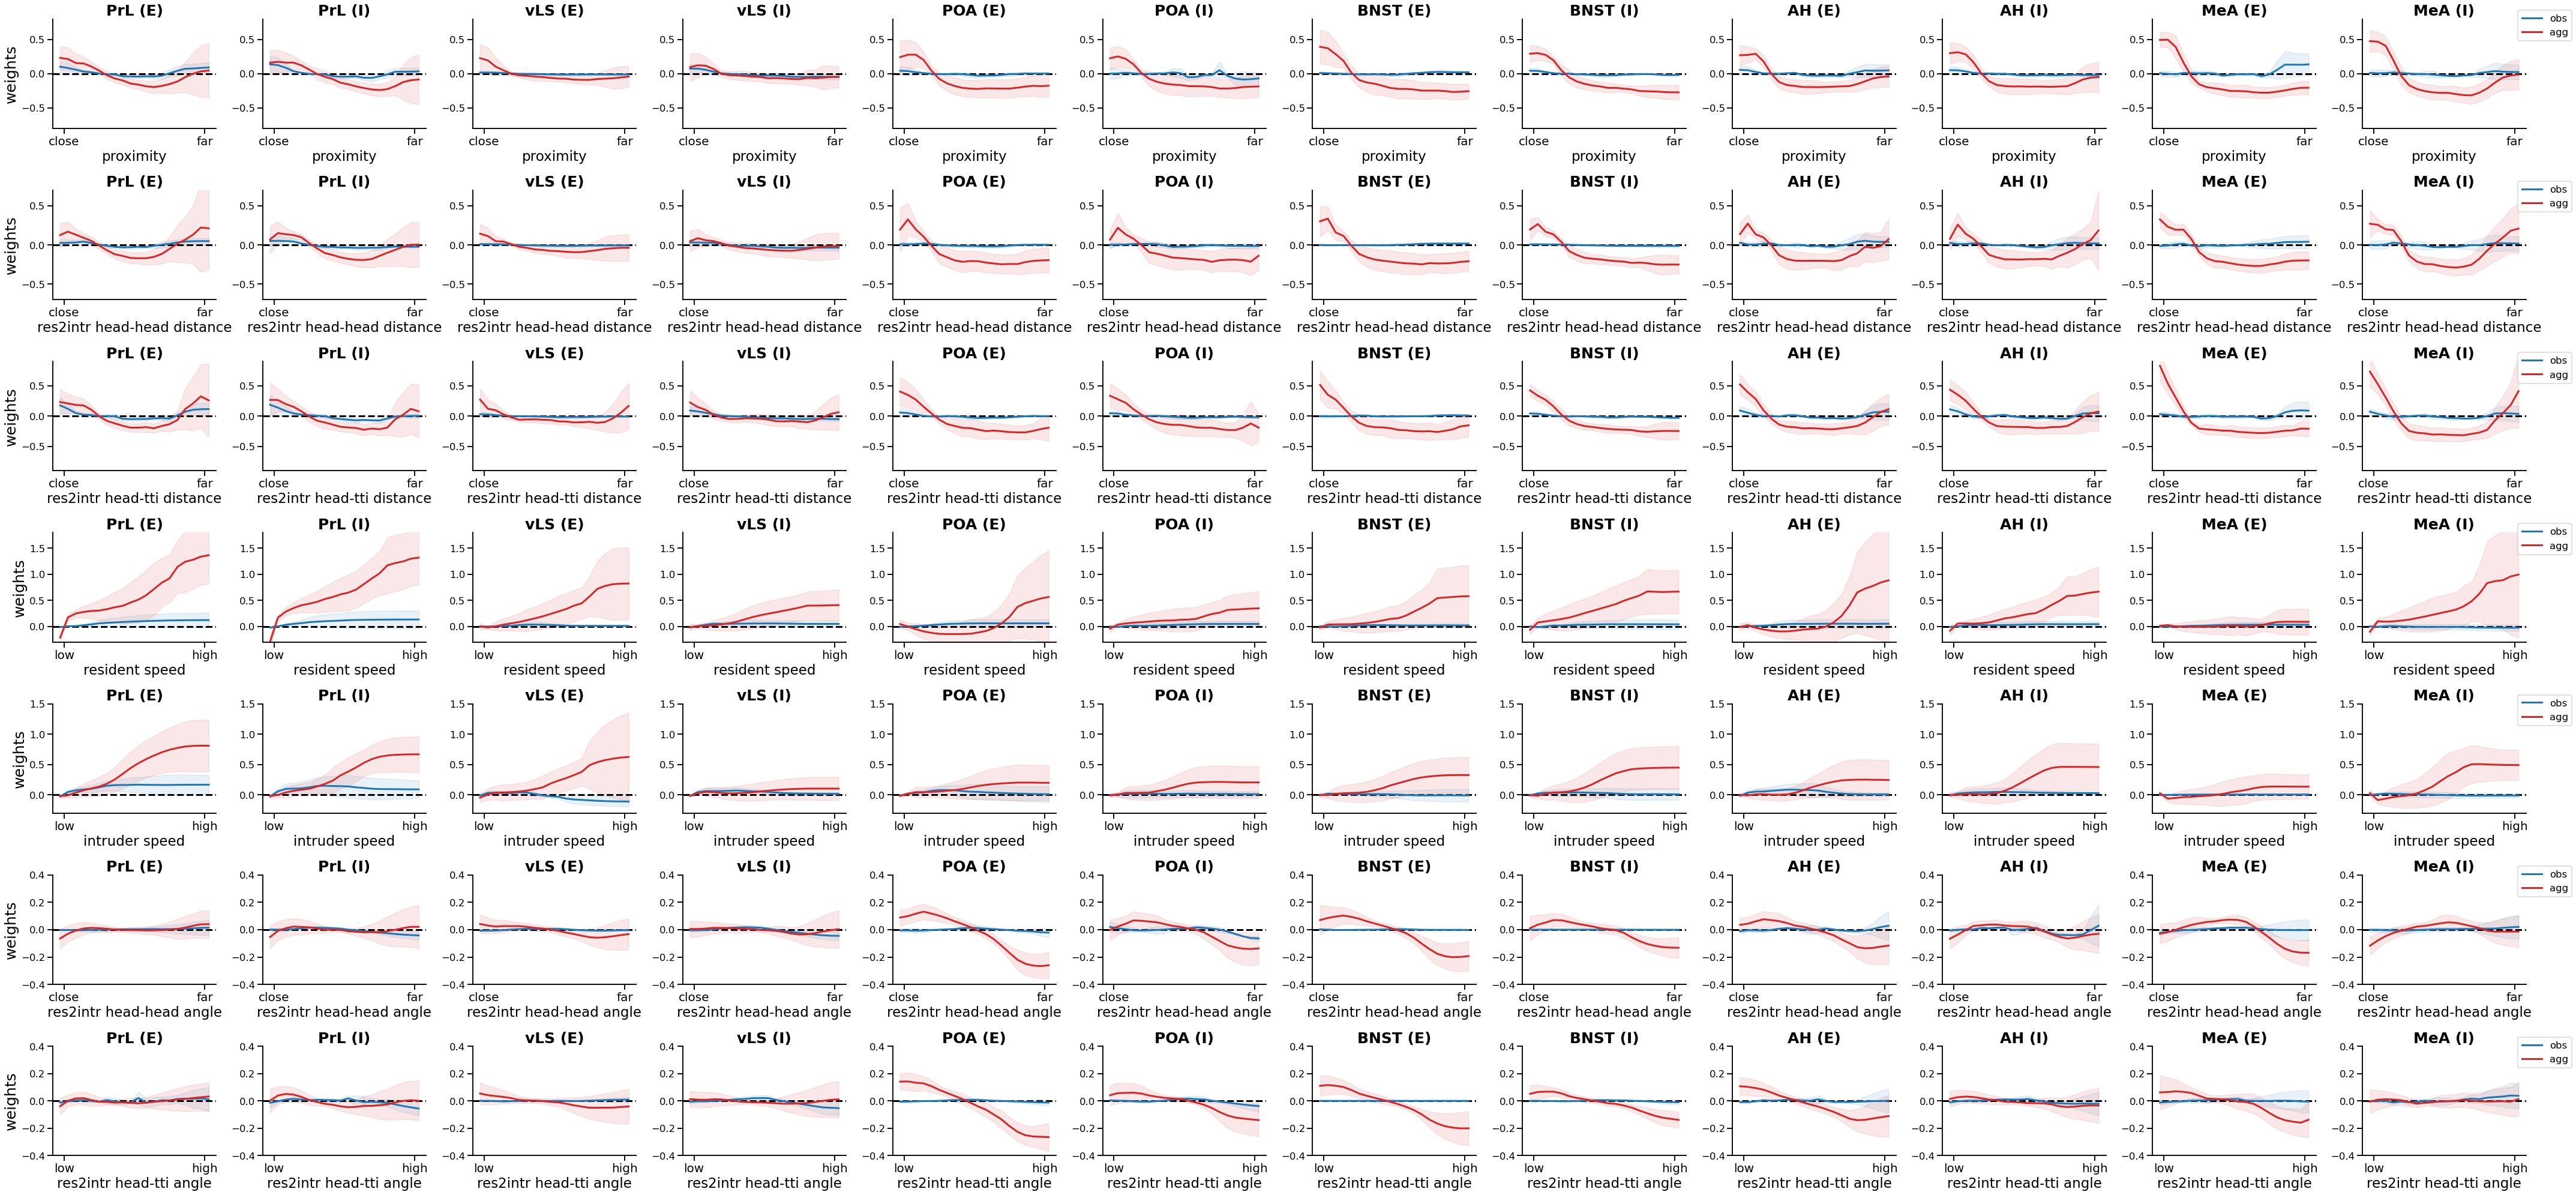

In [10]:
# PLOTTING TUNING CURVES FOR EACH FEATURE

# regionsInterest = list(range(len(maxRegions)))
# regionsInterest = [0,2,4,6,8,10,12,14,15,17,19] # excitatory
# regionsInterest = [1,3,5,7,9,11,13,16,18,20,21] # inhibitory

regionsInterest = [0,1,2,3,4,5,6,7,8,9,10,11]
set = 1
# regionsInterest = [11,12,13,14,15,16,17,18,19,20,21]
# set = 2

# featuresInterest_index = list(range(len(featuresLonglist)))
featuresInterest_index = [0,3,4,1,2,5,6]#,7,8,9]

fig, axes = plt.subplots(nrows=len(featuresInterest_index), ncols=len(regionsInterest), figsize=(5 * len(regionsInterest), 4 * len(featuresInterest_index)))

b = 0
for feature_ind in featuresInterest_index:

    c = 0
    for region_ind in regionsInterest:

        axes[b,c].axhline(0, color = 'black', ls = 'dashed', linewidth=3)
        axes[b,c].plot(weightsAllObs[:, region_ind, feature_ind, 1:].mean(axis=0), label='obs', color='tab:blue', linewidth=3) 
        axes[b,c].fill_between(range(20), weightsAllObs[:, region_ind, feature_ind, 1:].mean(axis=0) - weightsAllObs[:, region_ind, feature_ind, 1:].std(axis=0),weightsAllObs[:, region_ind, feature_ind, 1:].mean(axis=0) + weightsAllObs[:, region_ind, feature_ind, 1:].std(axis=0), alpha=0.1, color='tab:blue') 
        axes[b,c].plot(weightsAllAgg[:, region_ind, feature_ind, 1:].mean(axis=0), label='agg', color='tab:red', linewidth=3) 
        axes[b,c].fill_between(range(20), weightsAllAgg[:, region_ind, feature_ind, 1:].mean(axis=0) - weightsAllAgg[:, region_ind, feature_ind, 1:].std(axis=0),weightsAllAgg[:, region_ind, feature_ind, 1:].mean(axis=0) + weightsAllAgg[:, region_ind, feature_ind, 1:].std(axis=0), alpha=0.1, color='tab:red') 
        
            # axes[feature_ind].scatter(alpha_values[best_ind[feature_ind, Nday_ind][1]], test_mse[feature_ind, best_ind[feature_ind][0], best_ind[feature_ind][1]], color=cmapBlue.to_rgba(Nday_ind), label=f'Day {Nday_ind+1}')
            # axes[feature_ind].plot(alpha_values, train_mse_mean,  linestyle='dashed')
        axes[b,0].set_ylabel('weights',size=25)
        axes[b,c].set_title(maxRegions[region_ind], weight='bold', size=25)
        axes[b,c].set_xticks([])
        axes[b,c].spines[['right', 'top']].set_visible(False)
        axes[b,c].set_xticks([0.5,18.5],['low','high'], size=20)
        
        if feature_ind == 0:
            axes[b,c].set_ylim(-0.8,0.8)
            axes[b,c].set_xlabel('proximity',size=23)
            axes[b,c].set_xticks([0.5,18.5],['close','far'], size=20)
        elif feature_ind == 1:
            axes[b,c].set_ylim(-0.3,1.8)
            axes[b,c].set_xlabel('resident speed',size=23)
        elif feature_ind == 2:
            axes[b,c].set_ylim(-0.3,1.5)
            axes[b,c].set_xlabel('intruder speed',size=23)
        elif feature_ind == 3:
            axes[b,c].set_ylim(-0.7,0.7)
            axes[b,c].set_xlabel('res2intr head-head distance',size=23)
            axes[b,c].set_xticks([0.5,18.5],['close','far'], size=20)
        elif feature_ind == 4:
            axes[b,c].set_ylim(-0.9,0.9)
            axes[b,c].set_xlabel('res2intr head-tti distance',size=23) 
            axes[b,c].set_xticks([0.5,18.5],['close','far'], size=20)
        elif feature_ind == 5:
            axes[b,c].set_ylim(-0.4,0.4)
            axes[b,c].set_xlabel('res2intr head-head angle',size=23)
            axes[b,c].set_xticks([0.5,18.5],['close','far'], size=20)
        elif feature_ind == 6:
            axes[b,c].set_ylim(-0.4,0.4)
            axes[b,c].set_xlabel('res2intr head-tti angle',size=23)
        elif feature_ind == 7:
            axes[b,c].set_ylim(-0.2,0.2)
            axes[b,c].set_xlabel('intr2res head-centroid angle',size=23)
        elif feature_ind == 8:
            axes[b,c].set_ylim(-0.45,0.9)
            axes[b,c].set_xlabel(featuresLonglist[feature_ind],size=23)
        elif feature_ind == 9:
            axes[b,c].set_ylim(-0.5,0.5)
            axes[b,c].set_xlabel(featuresLonglist[feature_ind],size=23)
        # elif feature_ind == 8:
        #     axes[feature_ind,c].set_ylim(-0.5,1)
        # # last day
        # axes[feature_ind].plot(W_map[feature_ind, Nday_ind][1:], color='black', label=f'Test - Day 9')
        # axes[feature_ind].set_xlabel(featuresLonglist[feature_ind])  
        c += 1 
    axes[b,-1].legend(loc=(0.95,0.8))
    b += 1
    # fig.suptitle('Aggression group: ' + featuresLonglist[feature_ind], size=25, y=1.02)
fig.tight_layout()
# sns.set_context('talk')
plt.savefig(f'../figures/TuningCurves_AllDays_Set={set}.png', bbox_inches='tight', dpi=400)

In [121]:
# # regionsInterest = list(range(len(maxRegions)))
# regionsInterest = [0,2,4,6,8,10,12,14,15,17,19] # excitatory
# # regionsInterest = [1,3,5,7,9,11,13,16,18,20,21] # inhibitory

# regionsInterest = [0,7,9,12,14,17,20,21]


# featuresInterest_index = list(range(len(featuresLonglist)))
# featuresInterest_index = [0,1,2,5,8,9]

# binned_norm = np.abs(weightsAllAgg).mean(axis=0)
# binned_norm_std = np.abs(weightsAllAgg).std(axis=0)

# # ABSOLUTE VALUE OF WEIGHTS Averaged

# for feature_ind in featuresInterest_index:

#     fig, axes = plt.subplots(nrows=1, ncols=len(regionsInterest), figsize=(7 * len(regionsInterest), 5))
    
#     c = 0
#     for region_ind in regionsInterest:

#         axes[c].axhline(0, color = 'gray', ls = 'dashed')
#         axes[c].plot(range(20), binned_norm[region_ind, feature_ind, 1:], label='agg', color='tab:red')
#         axes[c].errorbar(range(20), binned_norm[region_ind, feature_ind, 1:], yerr=binned_norm_std[region_ind, feature_ind, 1:]) 
#         # axes[c].plot(weightsAllObs[:, region_ind, feature_ind, 1:].mean(axis=0), label='obs', color='tab:blue') 
#             # axes[feature_ind].scatter(alpha_values[best_ind[feature_ind, Nday_ind][1]], test_mse[feature_ind, best_ind[feature_ind][0], best_ind[feature_ind][1]], color=cmapBlue.to_rgba(Nday_ind), label=f'Day {Nday_ind+1}')
#             # axes[feature_ind].plot(alpha_values, train_mse_mean,  linestyle='dashed')
#         axes[c].set_xlabel( featuresLonglist[feature_ind] + ' filter')
#         axes[c].set_title(maxRegions[region_ind])
#         axes[c].set_xticks([])
#         axes[c].spines[['right', 'top']].set_visible(False)
#         # axes[c].set_ylim(-0.5,0.5)
#         # # last day
#         # axes[feature_ind].plot(W_map[feature_ind, Nday_ind][1:], color='black', label=f'Test - Day 9')
#         # axes[feature_ind].set_xlabel(featuresLonglist[feature_ind])  
#         c += 1 
         

#     axes[-1].legend(loc=(1.02,0.2))
#     # fig.suptitle('Aggression group: ' + featuresLonglist[feature_ind], size=25, y=1.02)
#     plt.show()

In [18]:
# # reconstructed data
# animal = '29L'
# df = load_and_wrangle(animal)
# regions = get_regions_dataframe(df)

# alpha_values = [10**x for x in range(-4,5)] 
# Nbin_values = [2**x for x in range(3,9)]
# Nbin_index = 3

# for region in ['BNST (E)']:#regions:
#     fits = np.load(f'../data/{animal}/{animal}_KFold={K}_MAP-estimation_region={region}.npz', allow_pickle=True)
#     W_map = fits['W_map']
#     train_mse = fits['train_mse']
#     test_mse = fits['test_mse']

    
#     for ind in [0]: # range(len(featuresShortlist)):

#         X_all, _, _ = get_design_X_GLM_features(animal, features=[featuresShortlist[ind]], Nbins=Nbin_values[Nbin_index], path=None)
#         Y_all, _ = get_output_Y_GLM(animal, region, path=None)

#         best_ind = np.argmin(test_mse[ind, Nbin_index, :])

#         fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
#         axes.plot(Y_all, color='gray', label='data')
#         axes.plot(X_all @ W_map[ind, Nbin_index, best_ind], color='black', label='model') 
#         axes.set_xlim(5000,10000)
#         axes.legend()
#         # axes[ind].set_title('test mse is ' + str(np.round(test_mse[ind, Nbin_index, best_ind], 3)))

#         fig.suptitle(str(region), size=20)
#         plt.show()

In [19]:
# # loading cluster fits

# # CHECKING NONLINEARITY


# animal = '29L'
# df = load_and_wrangle(animal)
# regions = get_regions_dataframe(df)

# alpha_values = [10**x for x in range(-4,5)] 
# Nbin_values = [2**x for x in range(3,9)]

# region = 'BNST (E)'

# fits = np.load(f'../data/{animal}/{animal}_MAP-estimation_region={region}.npz', allow_pickle=True)
# W_map = fits['W_map']
# train_mse = fits['train_mse']
# test_mse = fits['test_mse']

# index = 0 # index of feature (instead of for loop over all)

# best_ind = np.unravel_index(np.argmin(test_mse[ind, :, :]), test_mse[ind, :, :].shape) # finding best index across bin number and alphas
# X_all, X, bin_centers = get_design_X_GLM_features(animal, [featuresShortlist[ind]], Nbin_values[best_ind[0]])
# Y_all, Y = get_output_Y_GLM(animal, region)
# w_MLE = W_map[ind, best_ind[0], best_ind[1]]
    
# N = Nbin_values[best_ind[0]]
# h = np.histogram(X_all @ w_MLE, bins=N)
# y_avg = np.zeros((N))
# for bin in range(0,N):
#   ind_higher = np.argwhere(X_all @ w_MLE >= h[1][bin]).flatten()
#   ind_lower = np.argwhere(X_all @ w_MLE < h[1][bin+1]).flatten()
#   ind_bin = list(set(ind_lower).intersection(set(ind_higher)))
#   y_avg[bin] = Y_all[ind_bin].sum()/len(ind_bin)
# plt.scatter(X_all @ w_MLE, np.exp(X_all @ w_MLE), label='exp(x)')
# plt.scatter(X_all @ w_MLE, np.log(1+np.exp(X_all @ w_MLE)), label='log(1+exp(x))')
# plt.scatter(h[1][:-1], y_avg, color='red', label='avg spike count')
# plt.xlabel('Xw')
# plt.ylabel('f(Xw)')
# plt.legend()
# plt.title(region + " " + featuresShortlist[index])
# plt.show()

# FITS FOR INDIVIDUAL DAYS

In [11]:
Ndays = 9

# CREATING COLORMAPS 
n_lines = 9
x = np.linspace(0, 10, 100)
y = np.sin(x[:, None] + np.pi * np.linspace(0, 1, n_lines))
c = np.arange(1, n_lines + 1)

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmapRed = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)
cmapRed.set_array([])
print(cmapRed.to_rgba(2))

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmapBlue = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmapBlue.set_array([])
print(cmapBlue.to_rgba(2))

(0.9960476739715494, 0.8778623606305267, 0.8227758554402153, 1.0)
(0.8702191464821223, 0.9213225682429834, 0.9685044213763937, 1.0)


In [14]:
# # MSE as a function of day number for particular animal
# animal = '29L'
# group = 'agg'
# df = load_and_wrangle(animal, group)
# regions = get_regions_dataframe(df)

# alpha_values = [10**x for x in np.arange(1,8.5,0.5)] 
# Nbin_values = [20]
# Nbin_ind = 0
# K = 5

# for region in regions:
#     fits = np.load(f'../data/{animal}/{animal}_{group}_KFold={K}_MAP-estimation_per-day_region={region}.npz', allow_pickle=True)
#     W_map = fits['W_map']
#     train_mse = fits['train_mse']
#     test_mse = fits['test_mse']
#     r2_best = fits['r2_best']

#     fig, axes = plt.subplots(nrows=1, ncols=len(featuresInterest_index), figsize=(7 * len(featuresInterest_index), 5))
#     axes[0].set_ylabel('mean test MSE')

#     for feature_ind in featuresInterest_index:

#         for Nday_ind in range(Ndays):
                
#             # axes[feature_ind].scatter(alpha_values[best_ind[feature_ind, Nday_ind][1]], test_mse[feature_ind, best_ind[feature_ind][0], best_ind[feature_ind][1]], color=cmapBlue.to_rgba(Nday_ind), label=f'Day {Nday_ind+1}')
#             axes[feature_ind].plot(alpha_values, test_mse[feature_ind, Nday_ind], color=cmapBlue.to_rgba(Nday_ind), label=f'Day {Nday_ind+1}')
#             # axes[feature_ind].plot(alpha_values, train_mse_mean,  linestyle='dashed')
#             axes[feature_ind].set_xlabel('alpha')
#             axes[feature_ind].set_xscale('log')
#             axes[feature_ind].legend()
#             axes[feature_ind].set_title(featuresLonglist[feature_ind]) 

#     fig.suptitle(str(region), size=25, y=1.02)
#     plt.show()

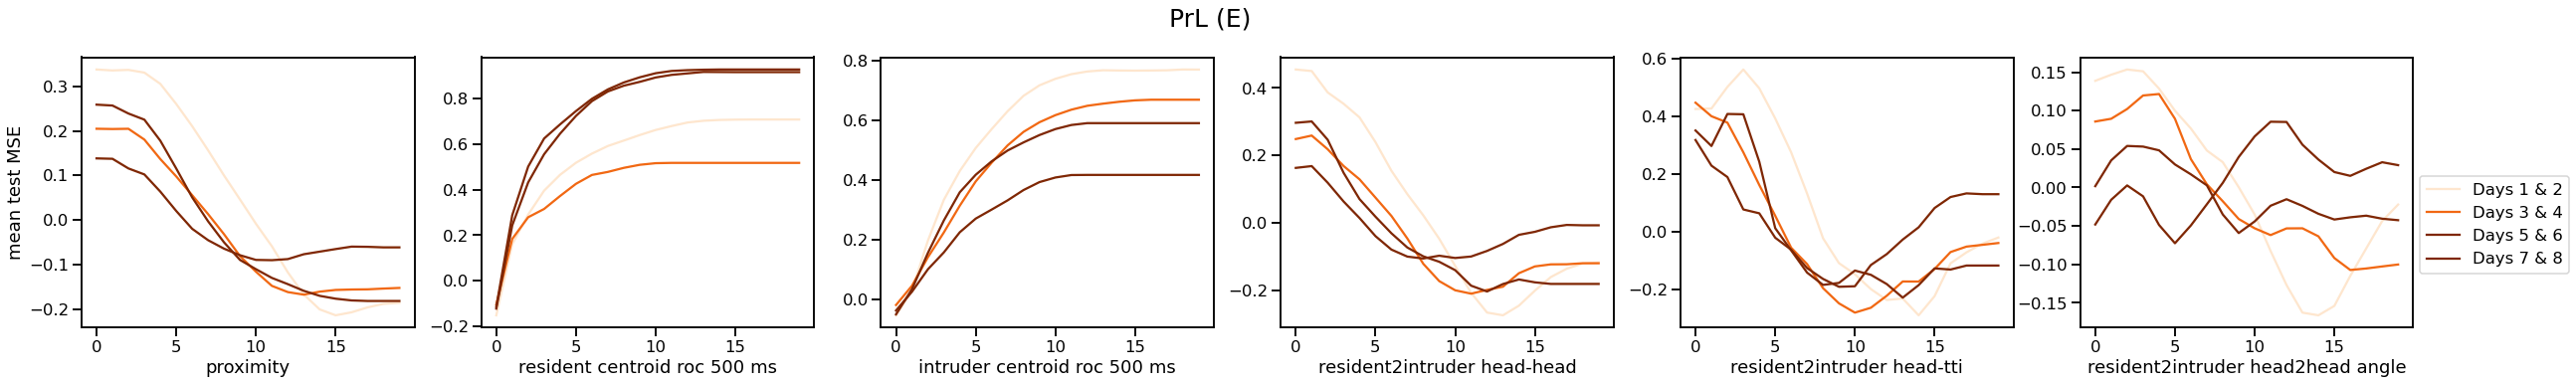

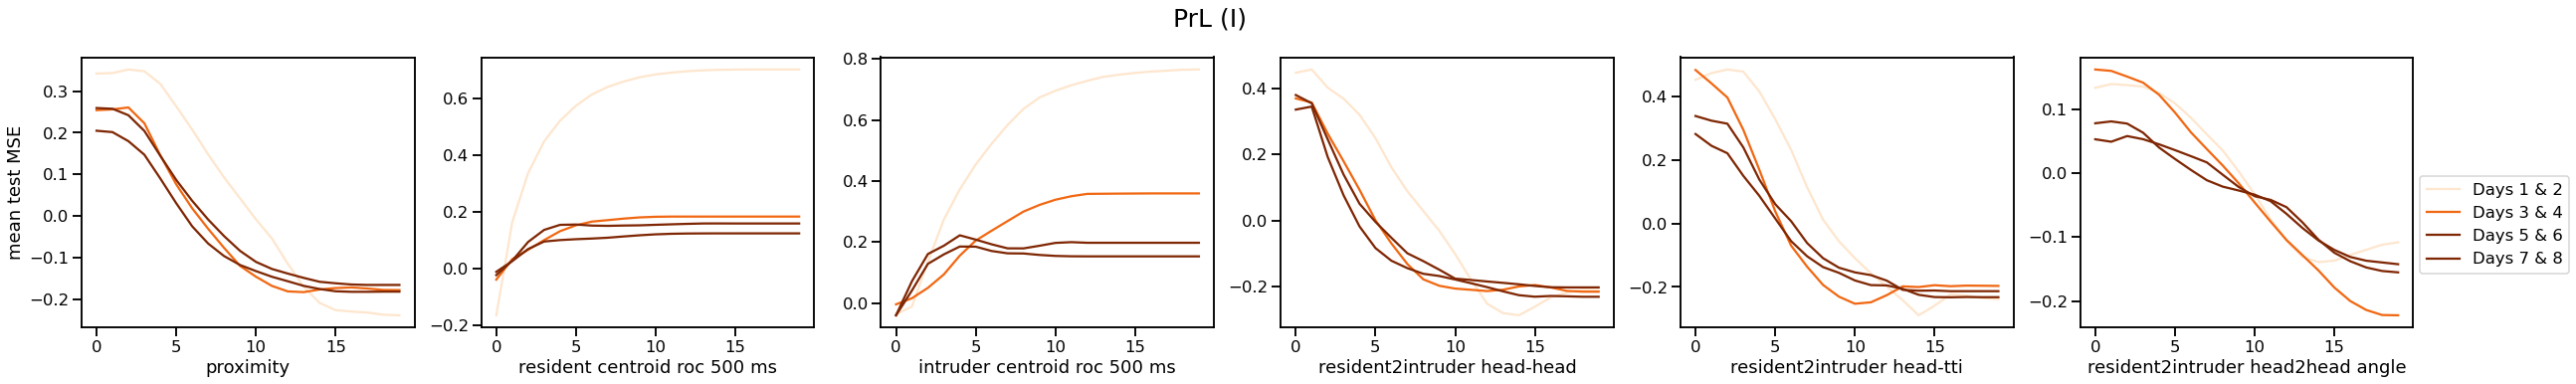

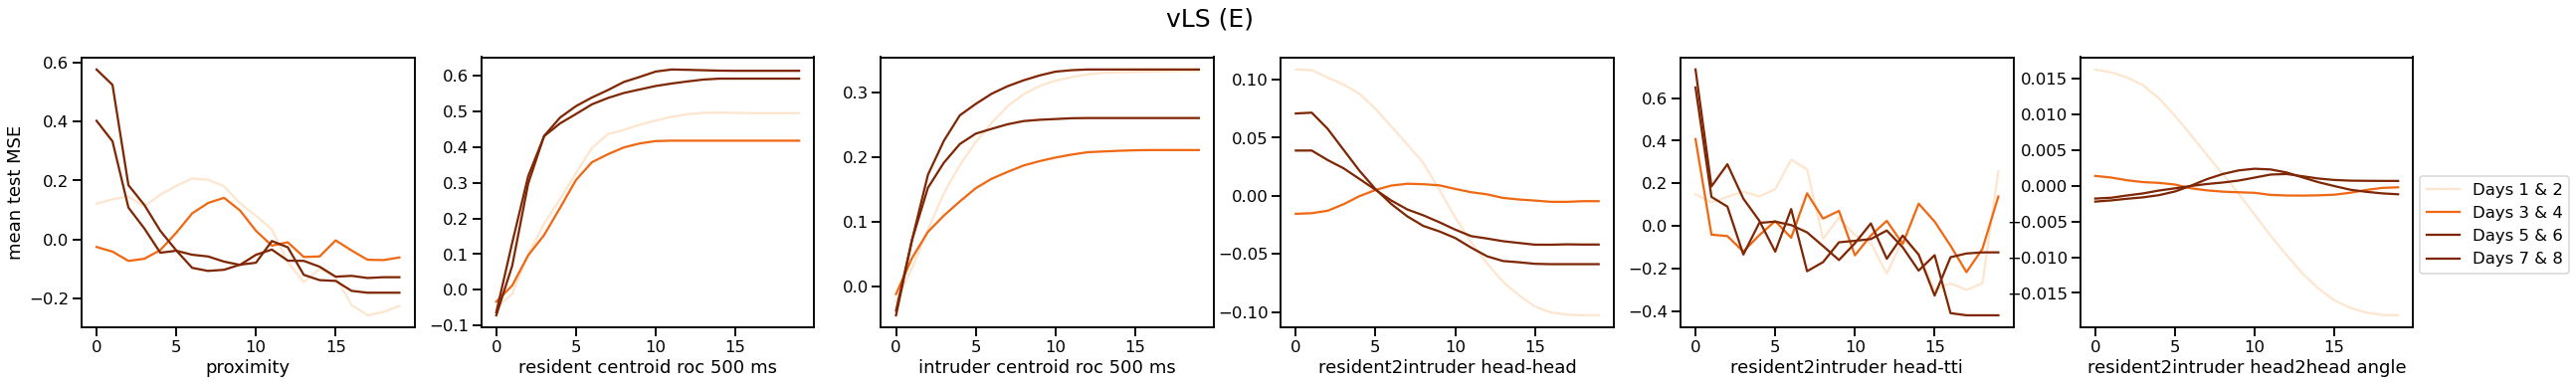

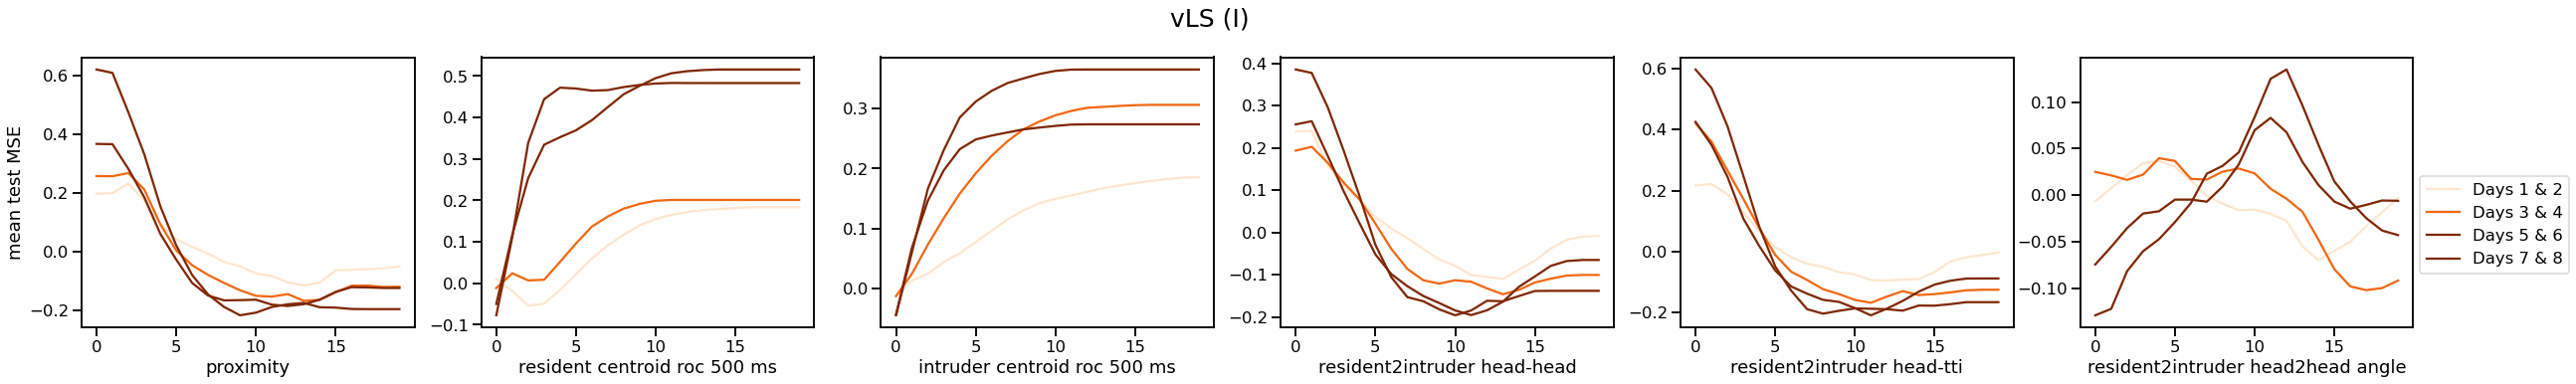

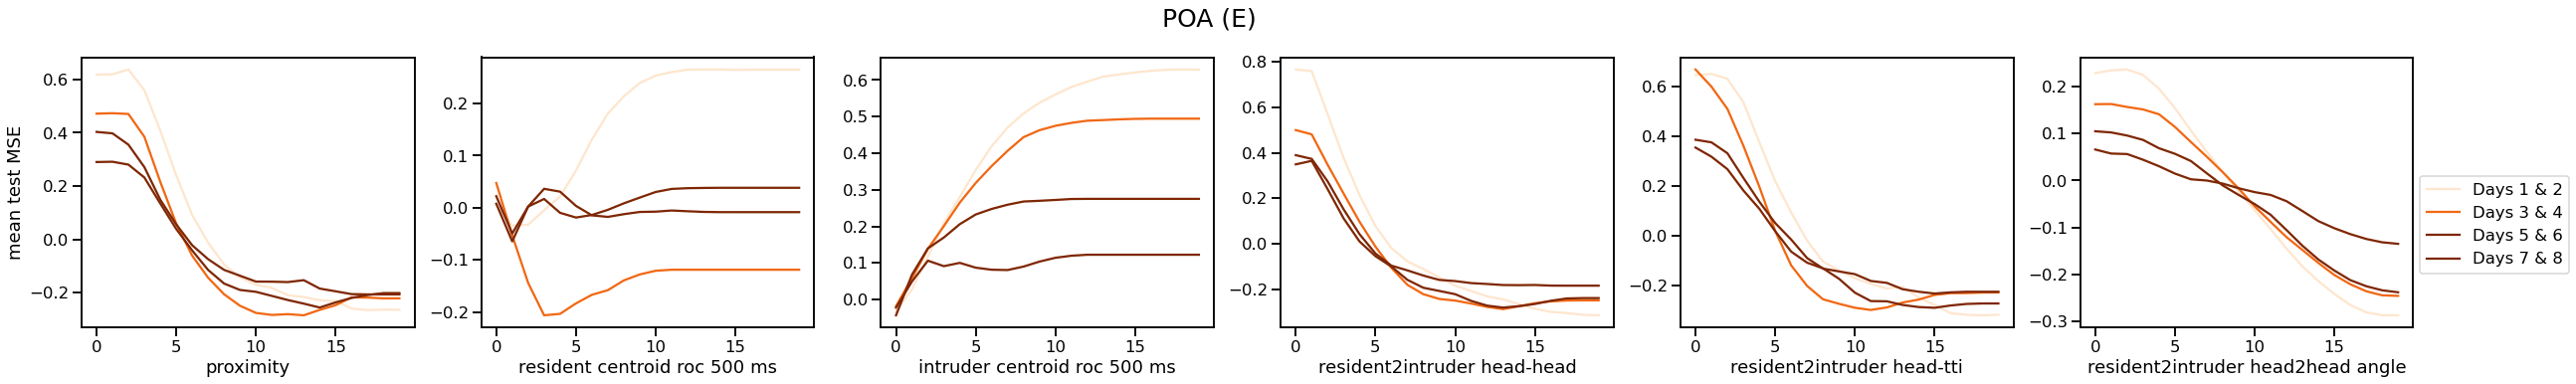

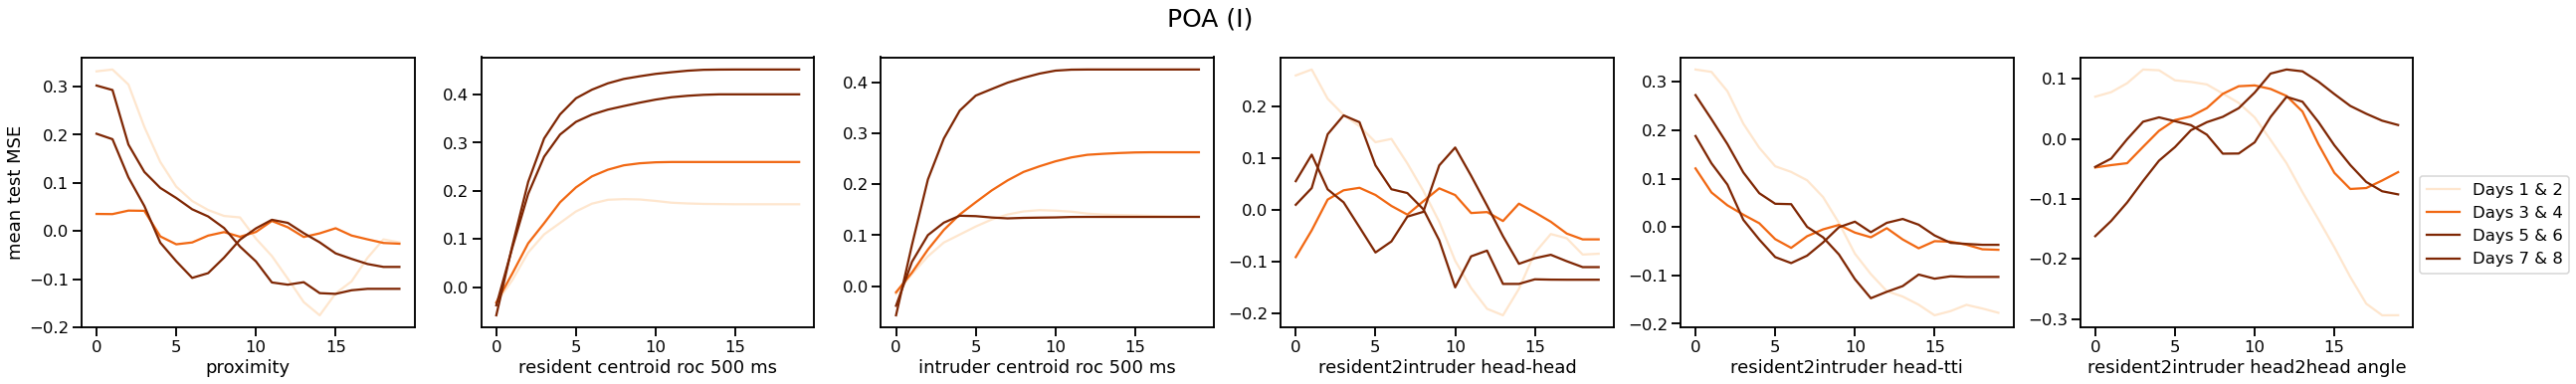

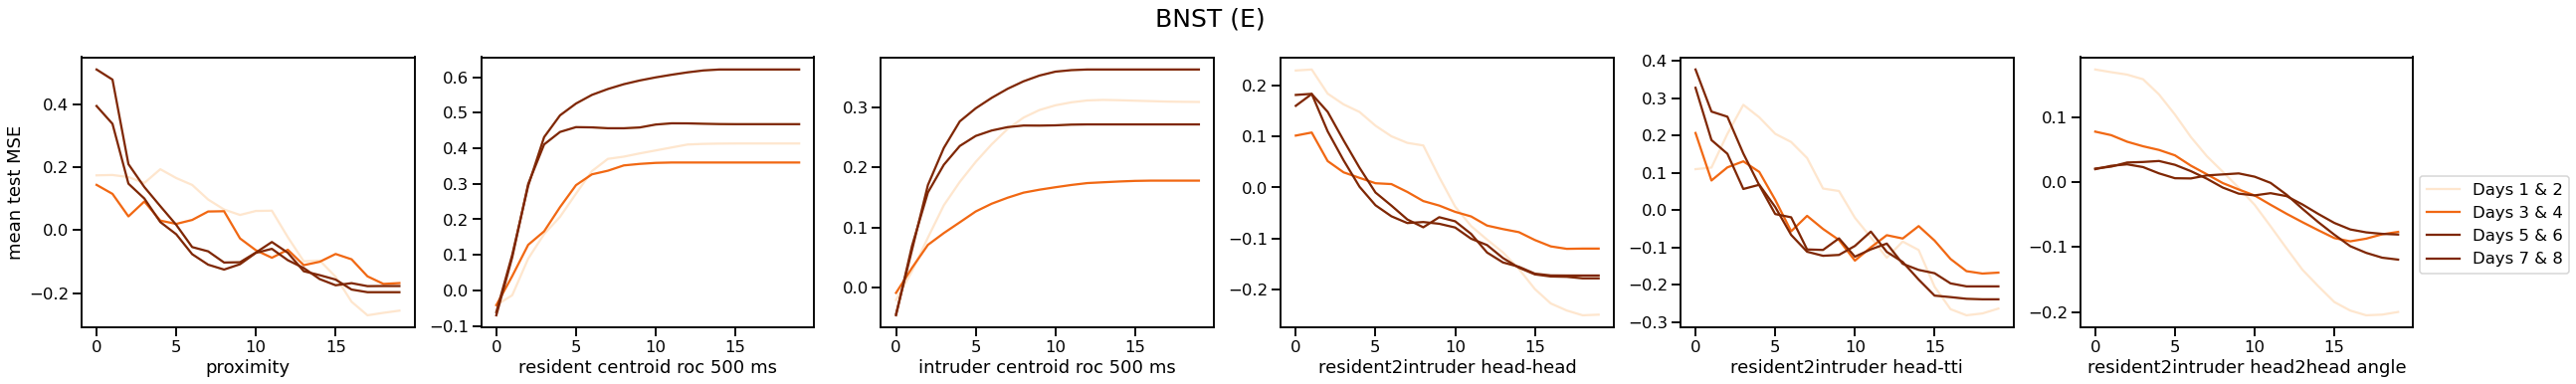

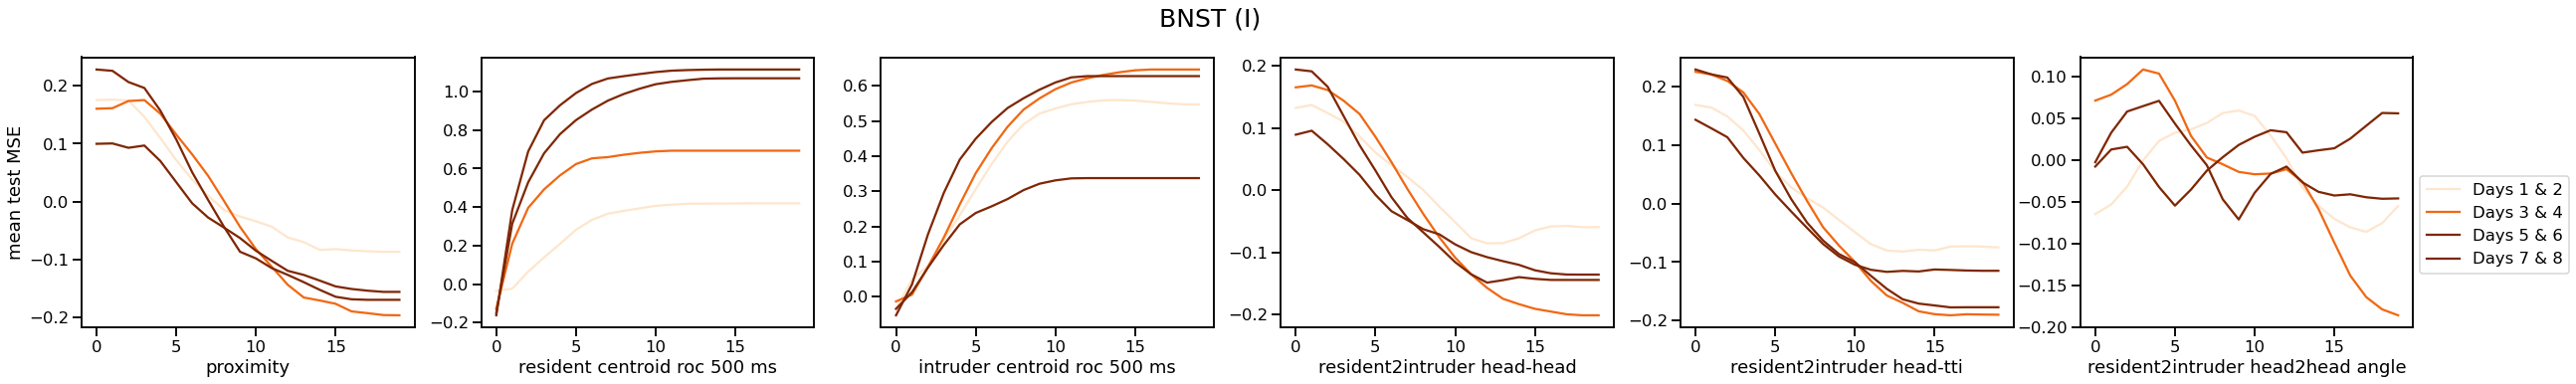

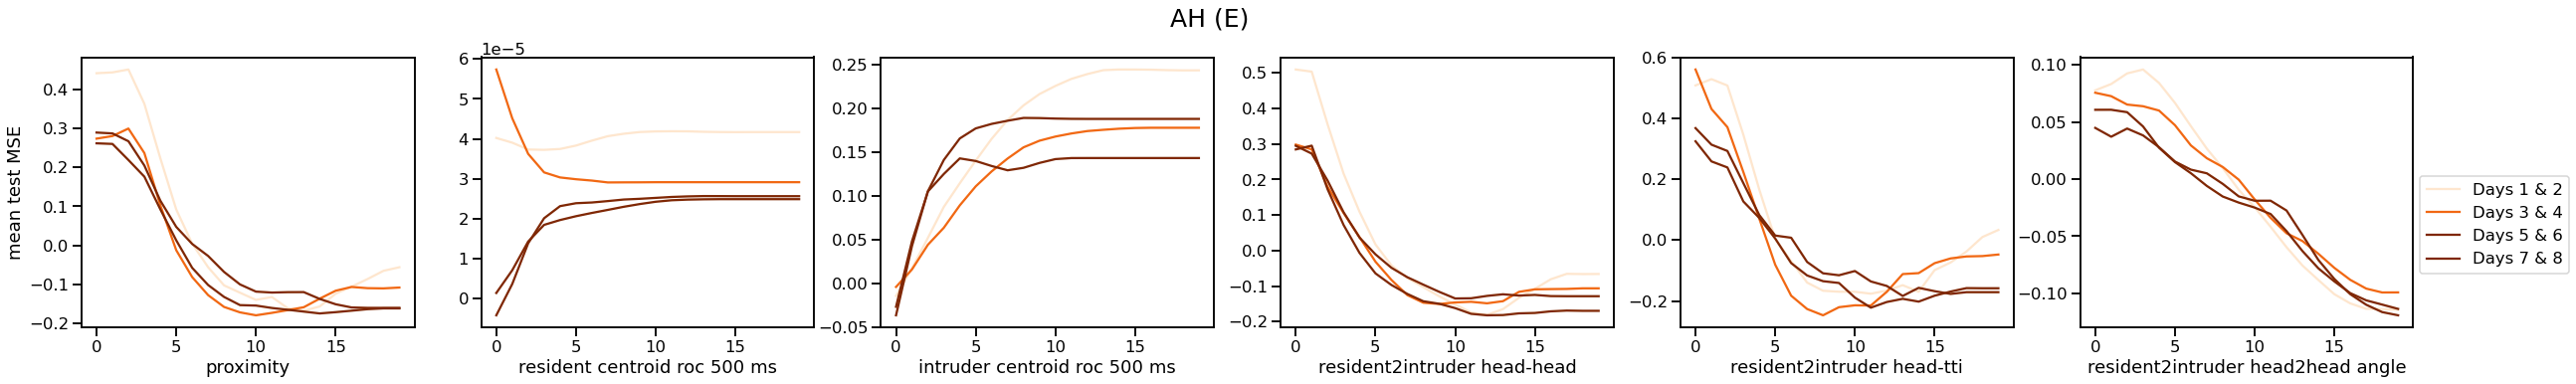

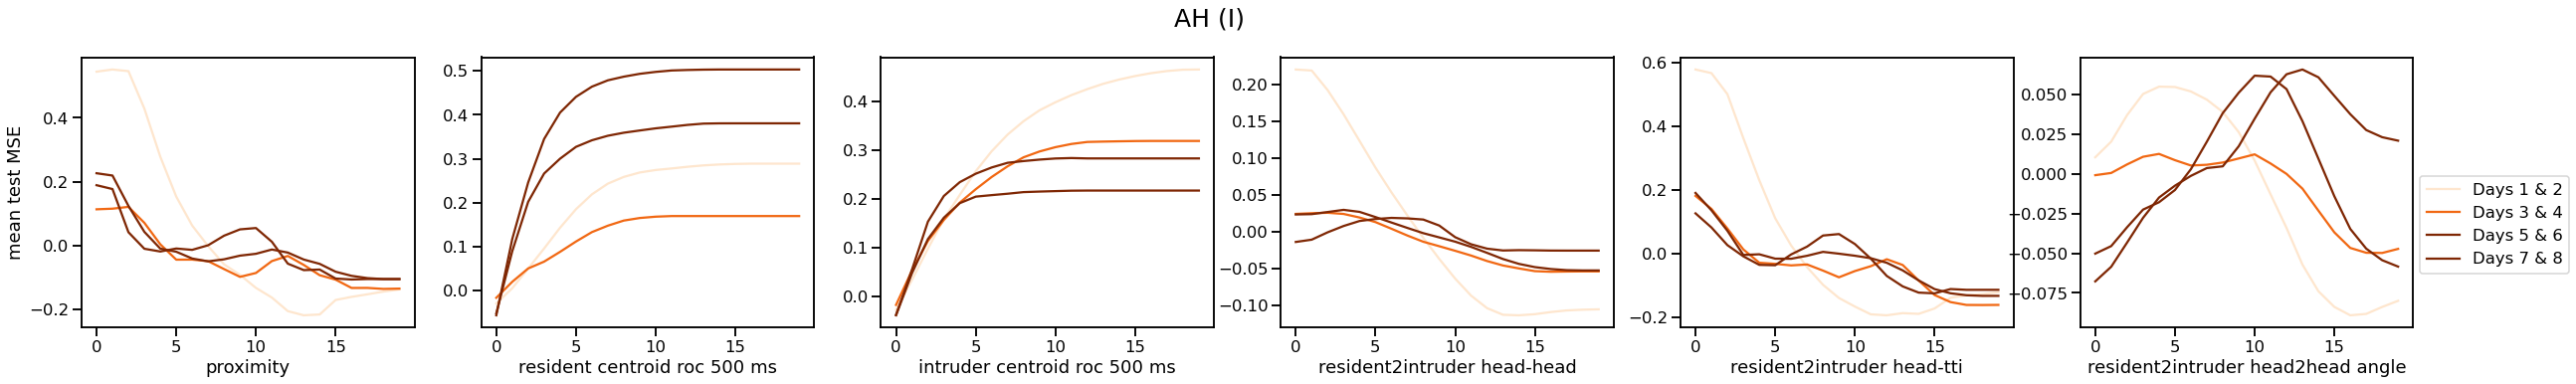

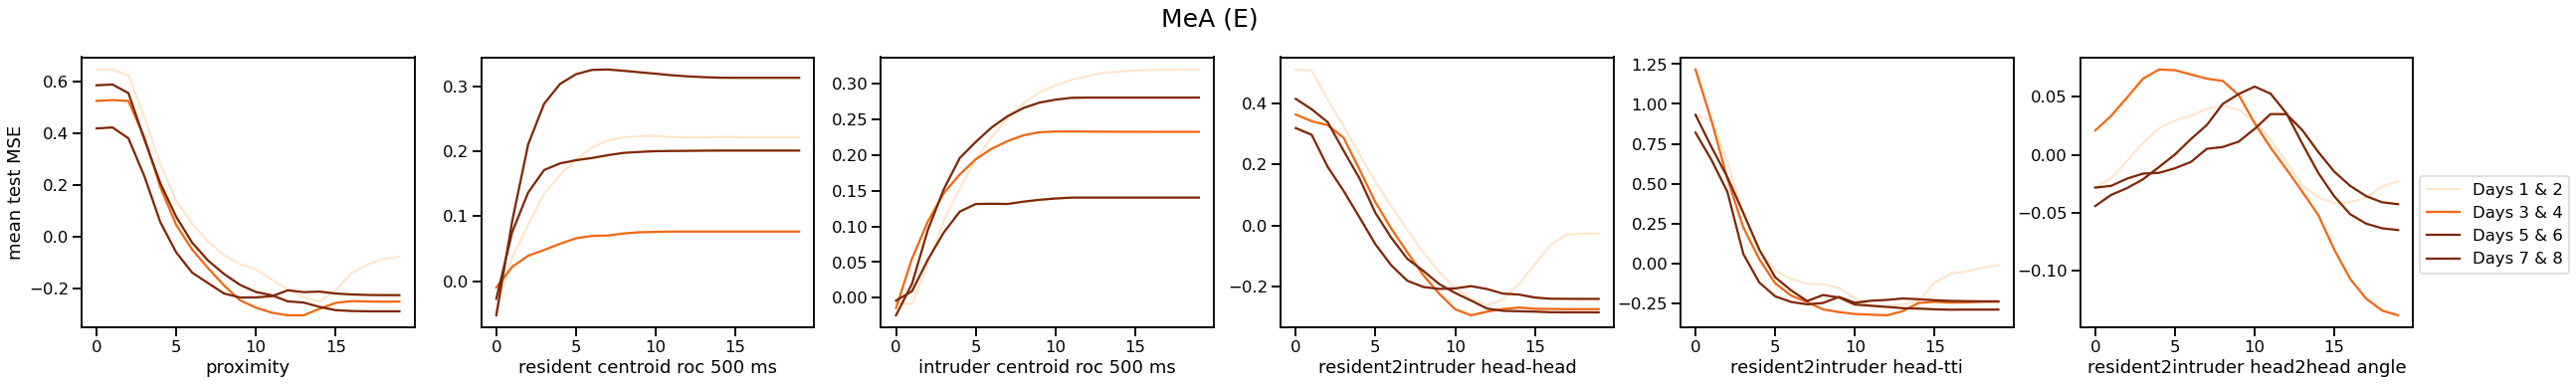

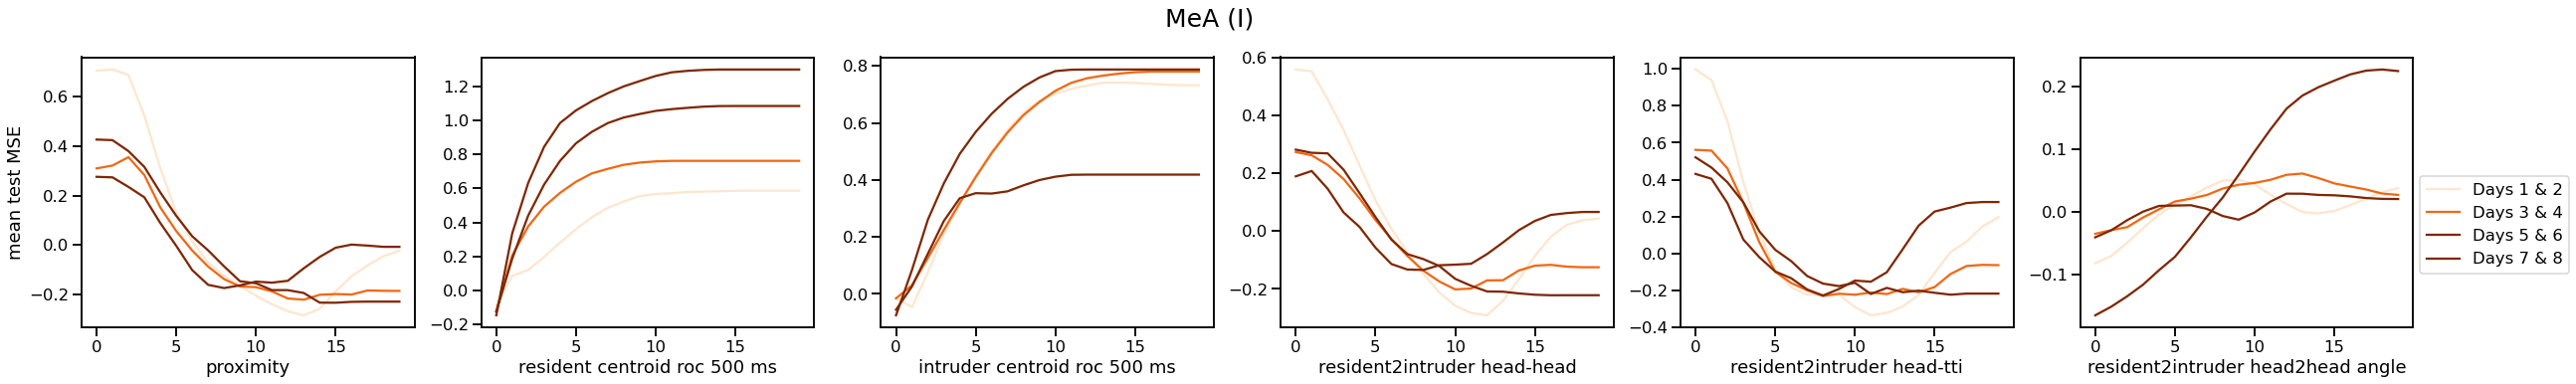

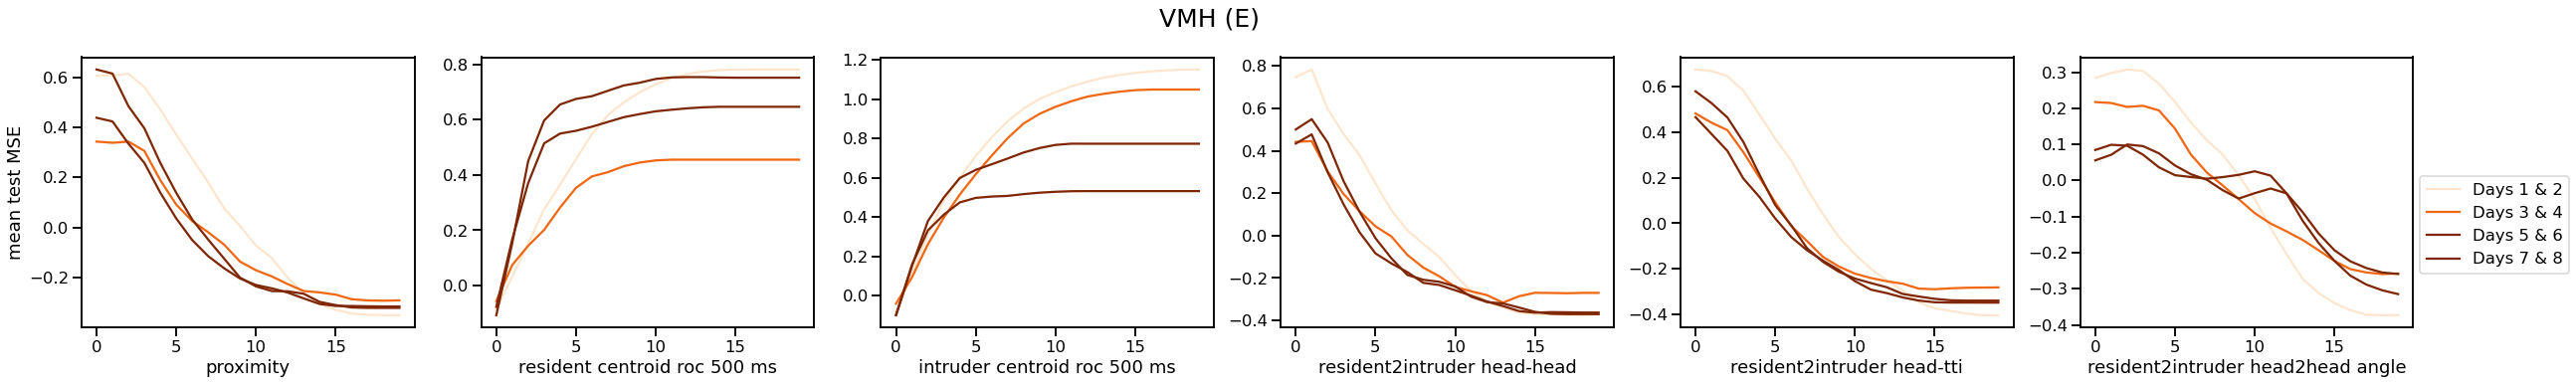

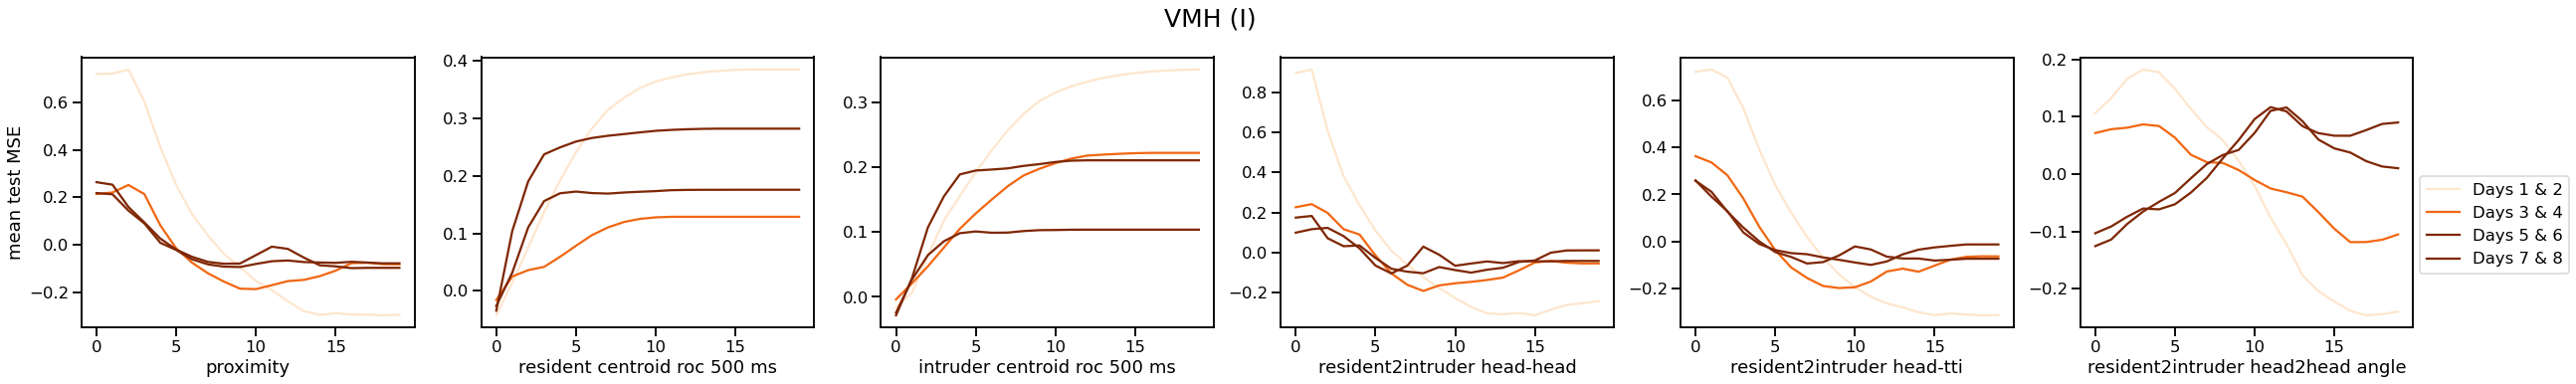

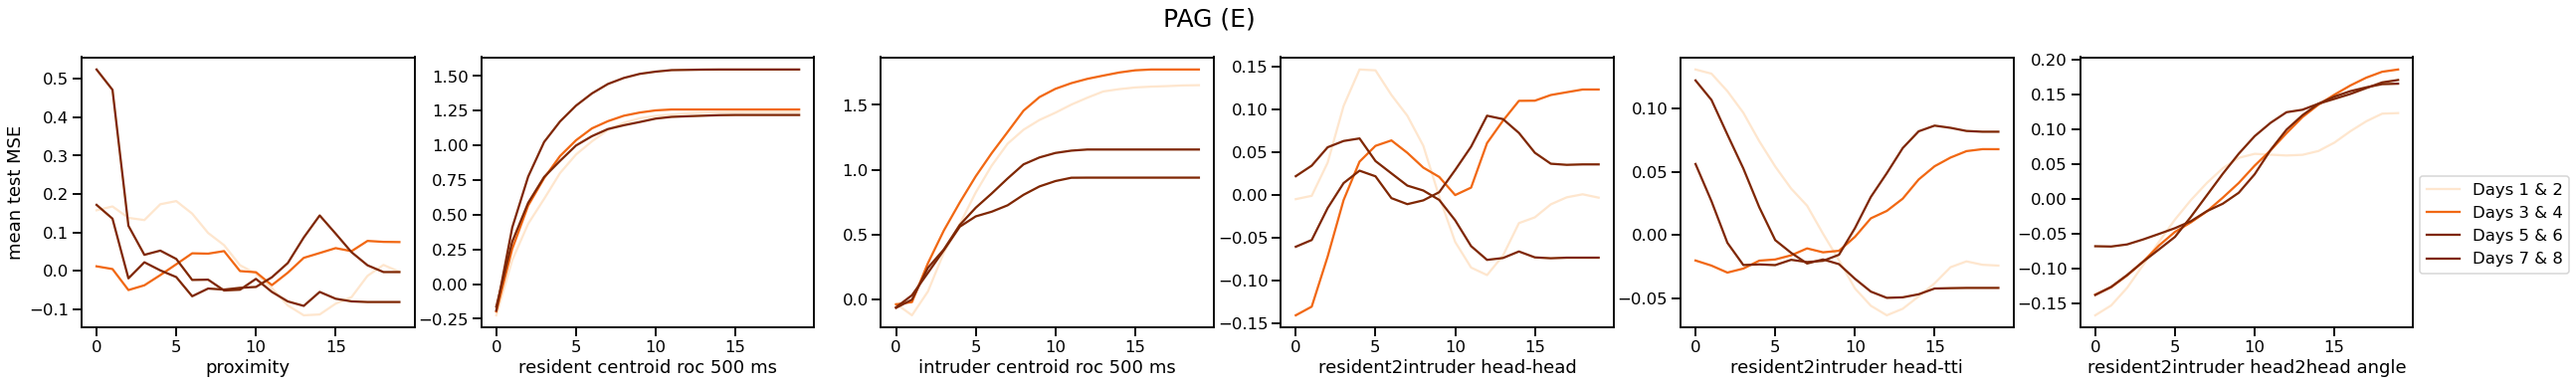

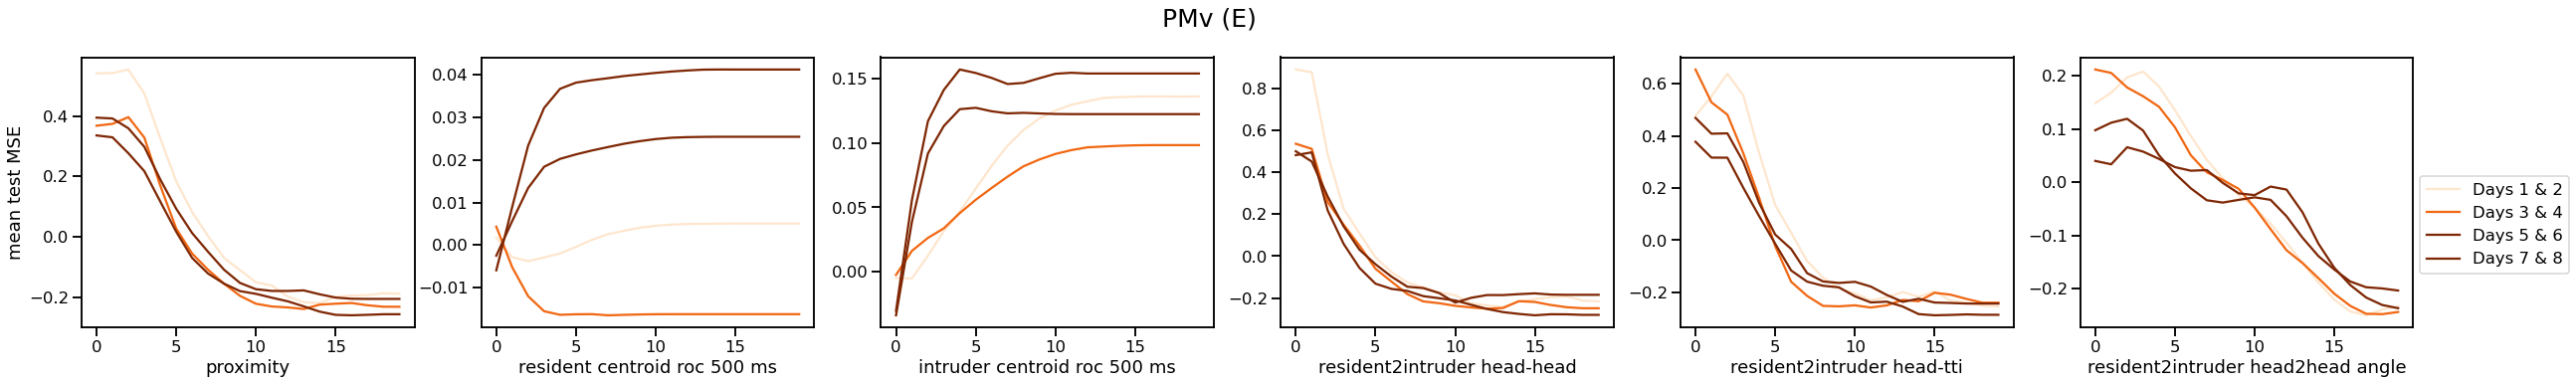

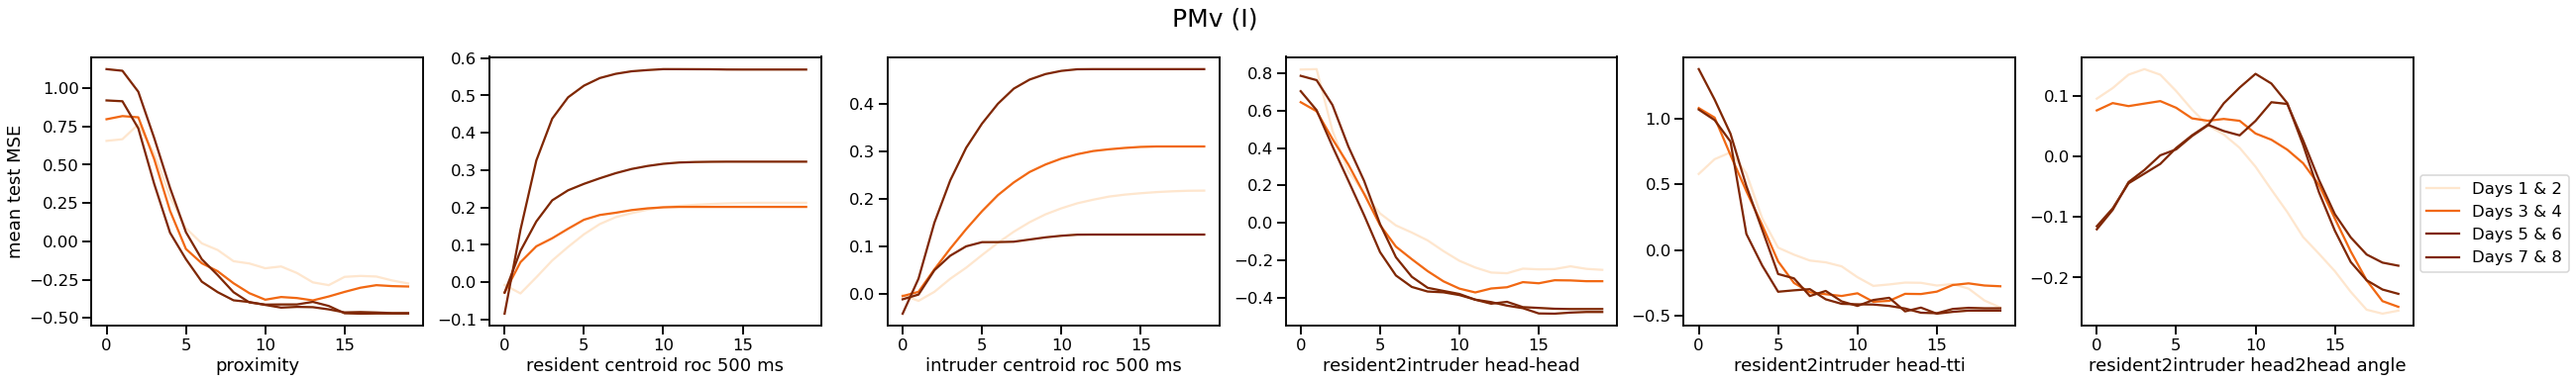

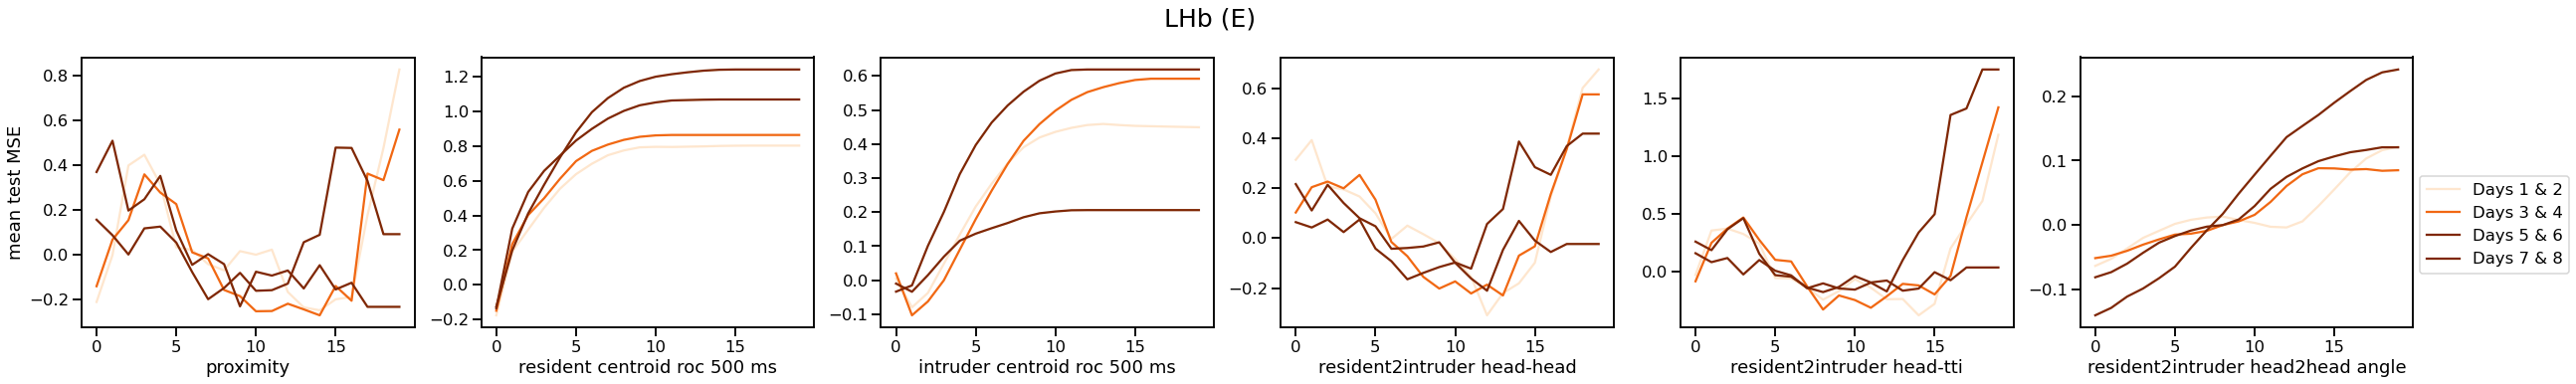

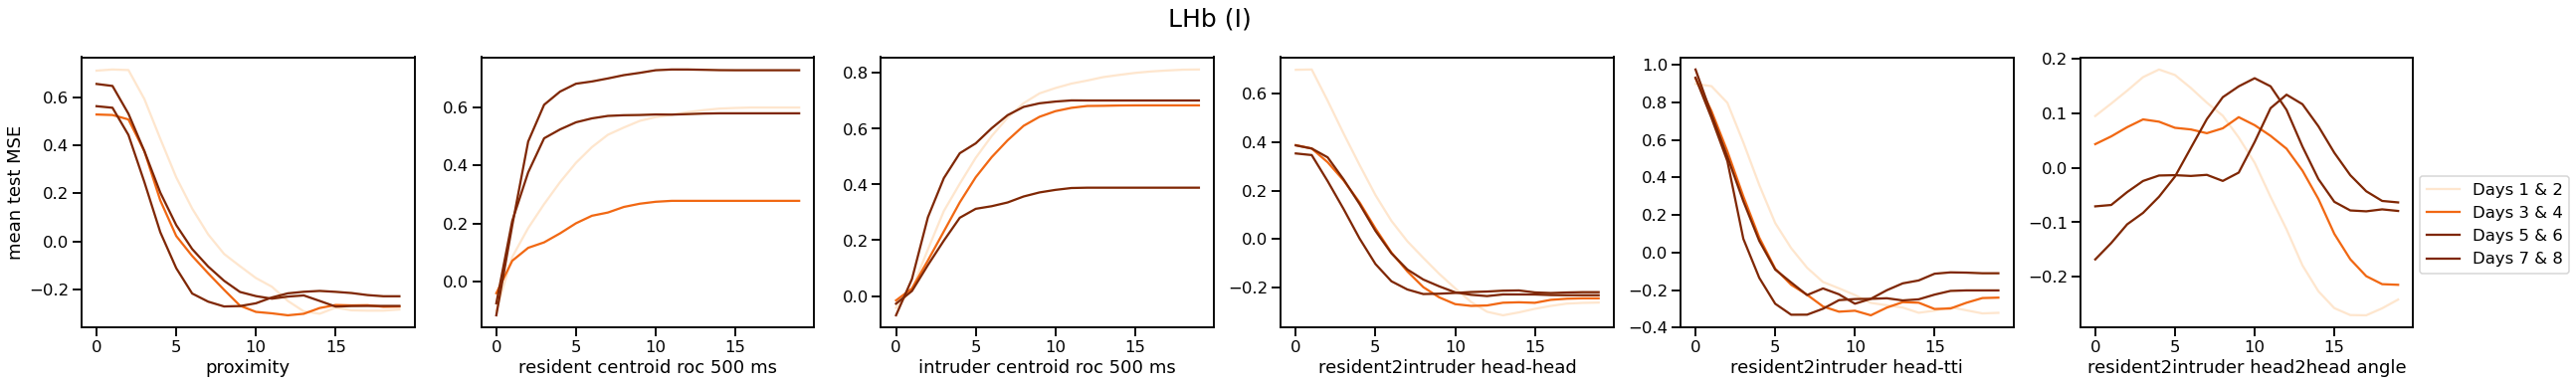

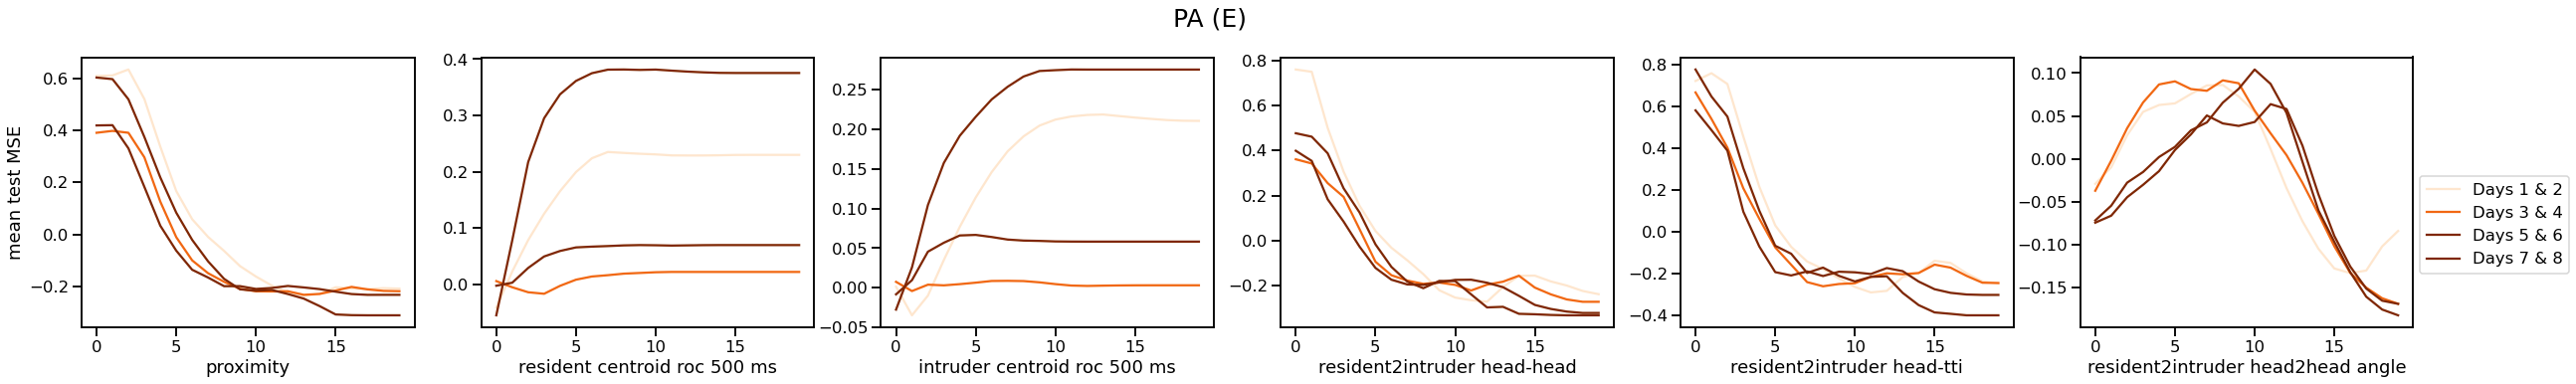

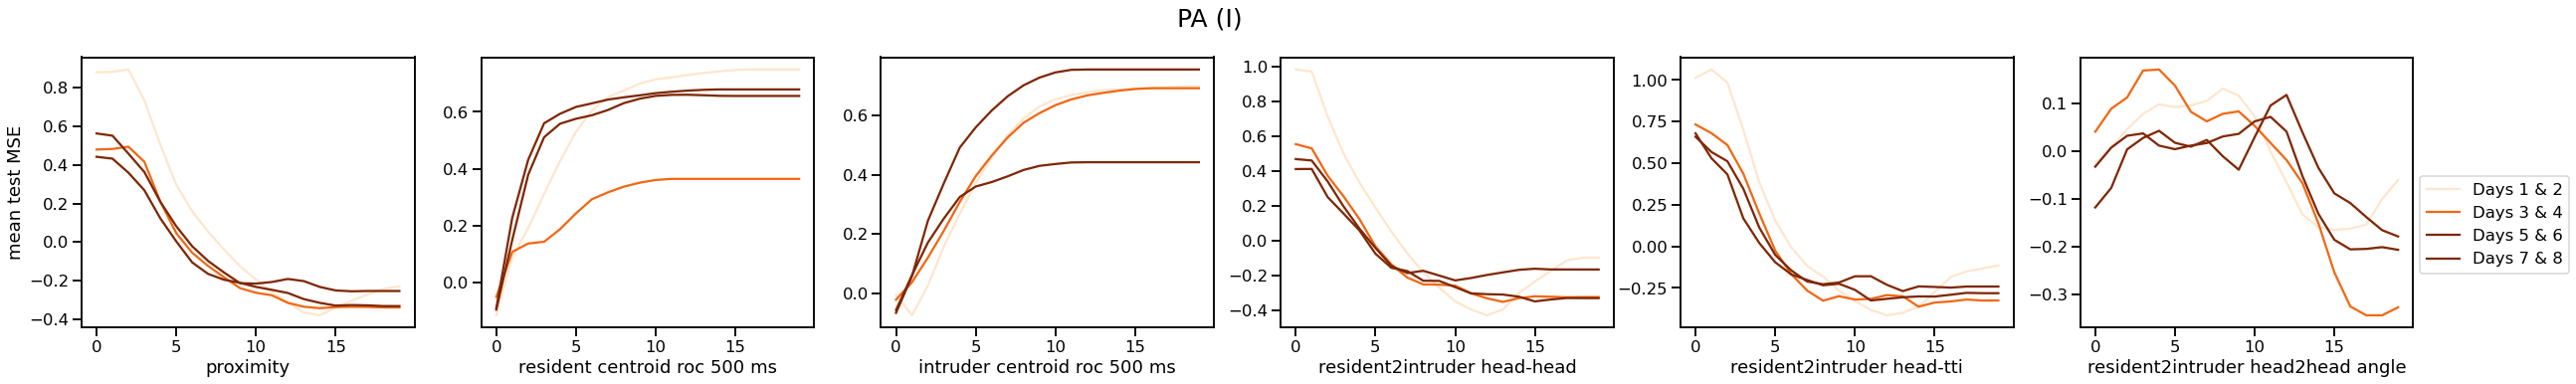

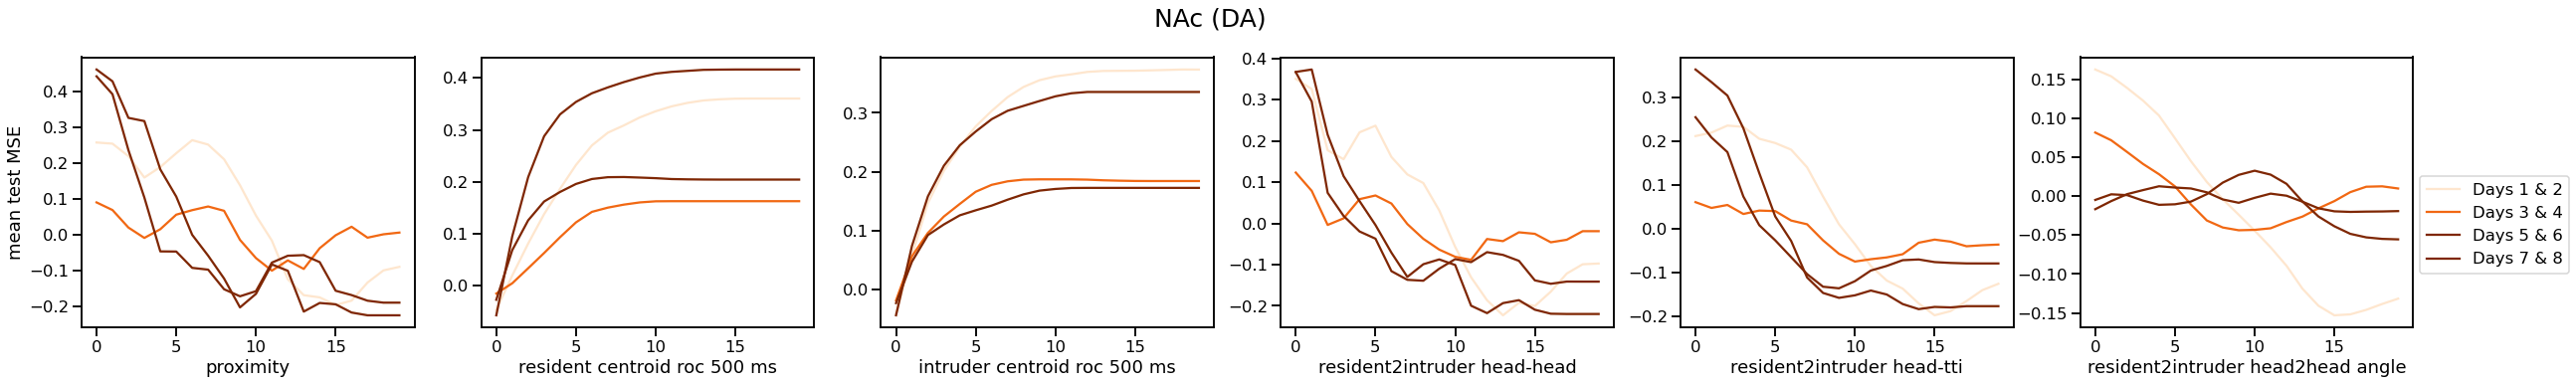

In [30]:
animal = '29L'
group = 'agg'
df = load_and_wrangle(animal, group)
regions = get_regions_dataframe(df)

alpha_values = [10**x for x in np.arange(1,8.5,0.5)] 
Nbin_values = [20]
Nbin_ind = 0
K = 5

for region in regions:
    fits = np.load(f'../data/{animal}/{animal}_{group}_KFold={K}_MAP-estimation_per-day_region={region}.npz', allow_pickle=True)
    W_map = fits['W_map']
    train_mse = fits['train_mse']
    test_mse = fits['test_mse']
    r2_best = fits['r2_best']

    fig, axes = plt.subplots(nrows=1, ncols=len(featuresInterest_index), figsize=(7 * len(featuresInterest_index), 5))
    axes[0].set_ylabel('mean test MSE')

    for feature_ind in featuresInterest_index:

        for Nday_ind in [0,2,4,6]: # all until last day
            w = (W_map[feature_ind, Nday_ind][1:] + W_map[feature_ind, Nday_ind+1][1:])/2
            # axes[feature_ind].scatter(alpha_values[best_ind[feature_ind, Nday_ind][1]], test_mse[feature_ind, best_ind[feature_ind][0], best_ind[feature_ind][1]], color=cmapBlue.to_rgba(Nday_ind), label=f'Day {Nday_ind+1}')
            axes[feature_ind].plot(w, color=cmapBlue.to_rgba(2*Nday_ind+2), label=f'Days {Nday_ind+1} & {Nday_ind+2}')
            # axes[feature_ind].plot(alpha_values, train_mse_mean,  linestyle='dashed')
            axes[feature_ind].set_xlabel(featuresLonglist[feature_ind])
        
        # # last day
        # axes[feature_ind].plot(W_map[feature_ind, Nday_ind][1:], color='black', label=f'Test - Day 9')
        # axes[feature_ind].set_xlabel(featuresLonglist[feature_ind])   
         

    axes[-1].legend(loc=(1.02,0.2))
    fig.suptitle(str(region), size=25, y=1.02)
    plt.show()

In [13]:
# Averaged across animals for aggression group
Ndays=9
Nbin_ind = 0
Nbin_total = Nbin_values[Nbin_ind] + 1

weightsAllAgg_Days = np.ma.empty((len(animalsAgg), len(maxRegions), len(featuresLonglist), Nbin_total, Ndays))
weightsAllAgg_Days.mask = True
group = 'agg'
for animal_ind in range(len(animalsAgg)):
    animal = animalsAgg[animal_ind]
    df = load_and_wrangle(animal, group=group)
    regions = get_regions_dataframe(df)
    for region in regions:
        region_ind = maxRegions.index(region) # the index of the region in the list of all possible regions (maxRegions)
        
        fits = np.load(f'../data/{animal}/{animal}_{group}_KFold={K}_MAP-estimation_per-day_region={region}.npz', allow_pickle=True)
        W_map = fits['W_map']
        # train_mse = fits['train_mse']
        # test_mse = fits['test_mse']
        # r2_best = fits['r2_best']

        for feature_ind in range(len(featuresLonglist)):
            for Nday_ind in range(Ndays):
                weightsAllAgg_Days[animal_ind, region_ind, feature_ind, :, Nday_ind] = W_map[feature_ind, Nday_ind]


weightsAllObs_Days = np.ma.empty((len(animalsObs), len(maxRegions), len(featuresLonglist), Nbin_total, Ndays))
weightsAllObs_Days.mask = True
group = 'obs'
for animal_ind in range(len(animalsObs)):
    animal = animalsObs[animal_ind]
    df = load_and_wrangle(animal, group=group)
    regions = get_regions_dataframe(df)
    for region in regions:
        region_ind = maxRegions.index(region) # the index of the region in the list of all possible regions (maxRegions)
        
        fits = np.load(f'../data/{animal}/{animal}_{group}_KFold={K}_MAP-estimation_per-day_region={region}.npz', allow_pickle=True)
        W_map = fits['W_map']
        
        # train_mse = fits['train_mse']
        # test_mse = fits['test_mse']
        # r2_best = fits['r2_best']

        for feature_ind in range(len(featuresLonglist)):
            for Nday_ind in range(Ndays):
                weightsAllObs_Days[animal_ind, region_ind, feature_ind, :, Nday_ind] = W_map[feature_ind, Nday_ind]

# meanWeightsAgg_Days = weightsAllAgg_Days.mean(axis=0)
# meanWeightsObs_Days = weightsAllObs_Days.mean(axis=0)


In [21]:
print(featuresLonglist)

['proximity', 'resident centroid roc 500 ms', 'intruder centroid roc 500 ms', 'resident2intruder head-head', 'resident2intruder head-tti', 'resident2intruder head2head angle', 'resident2intruder head2tti angle', 'intruder2resident head2centroid angle', 'resident tti2head', 'intruder tti2head', 'resident tailbase2head angle', 'intruder tailbase2head angle']


In [38]:
print(maxRegions)

['PrL (E)', 'PrL (I)', 'vLS (E)', 'vLS (I)', 'POA (E)', 'POA (I)', 'BNST (E)', 'BNST (I)', 'AH (E)', 'AH (I)', 'MeA (E)', 'MeA (I)', 'VMH (E)', 'VMH (I)', 'PAG (E)', 'PMv (E)', 'PMv (I)', 'LHb (E)', 'LHb (I)', 'PA (E)', 'PA (I)', 'NAc (DA)']


In [14]:
colors={0:'gray', 6:'dark red'}
print(colors[6])

dark red


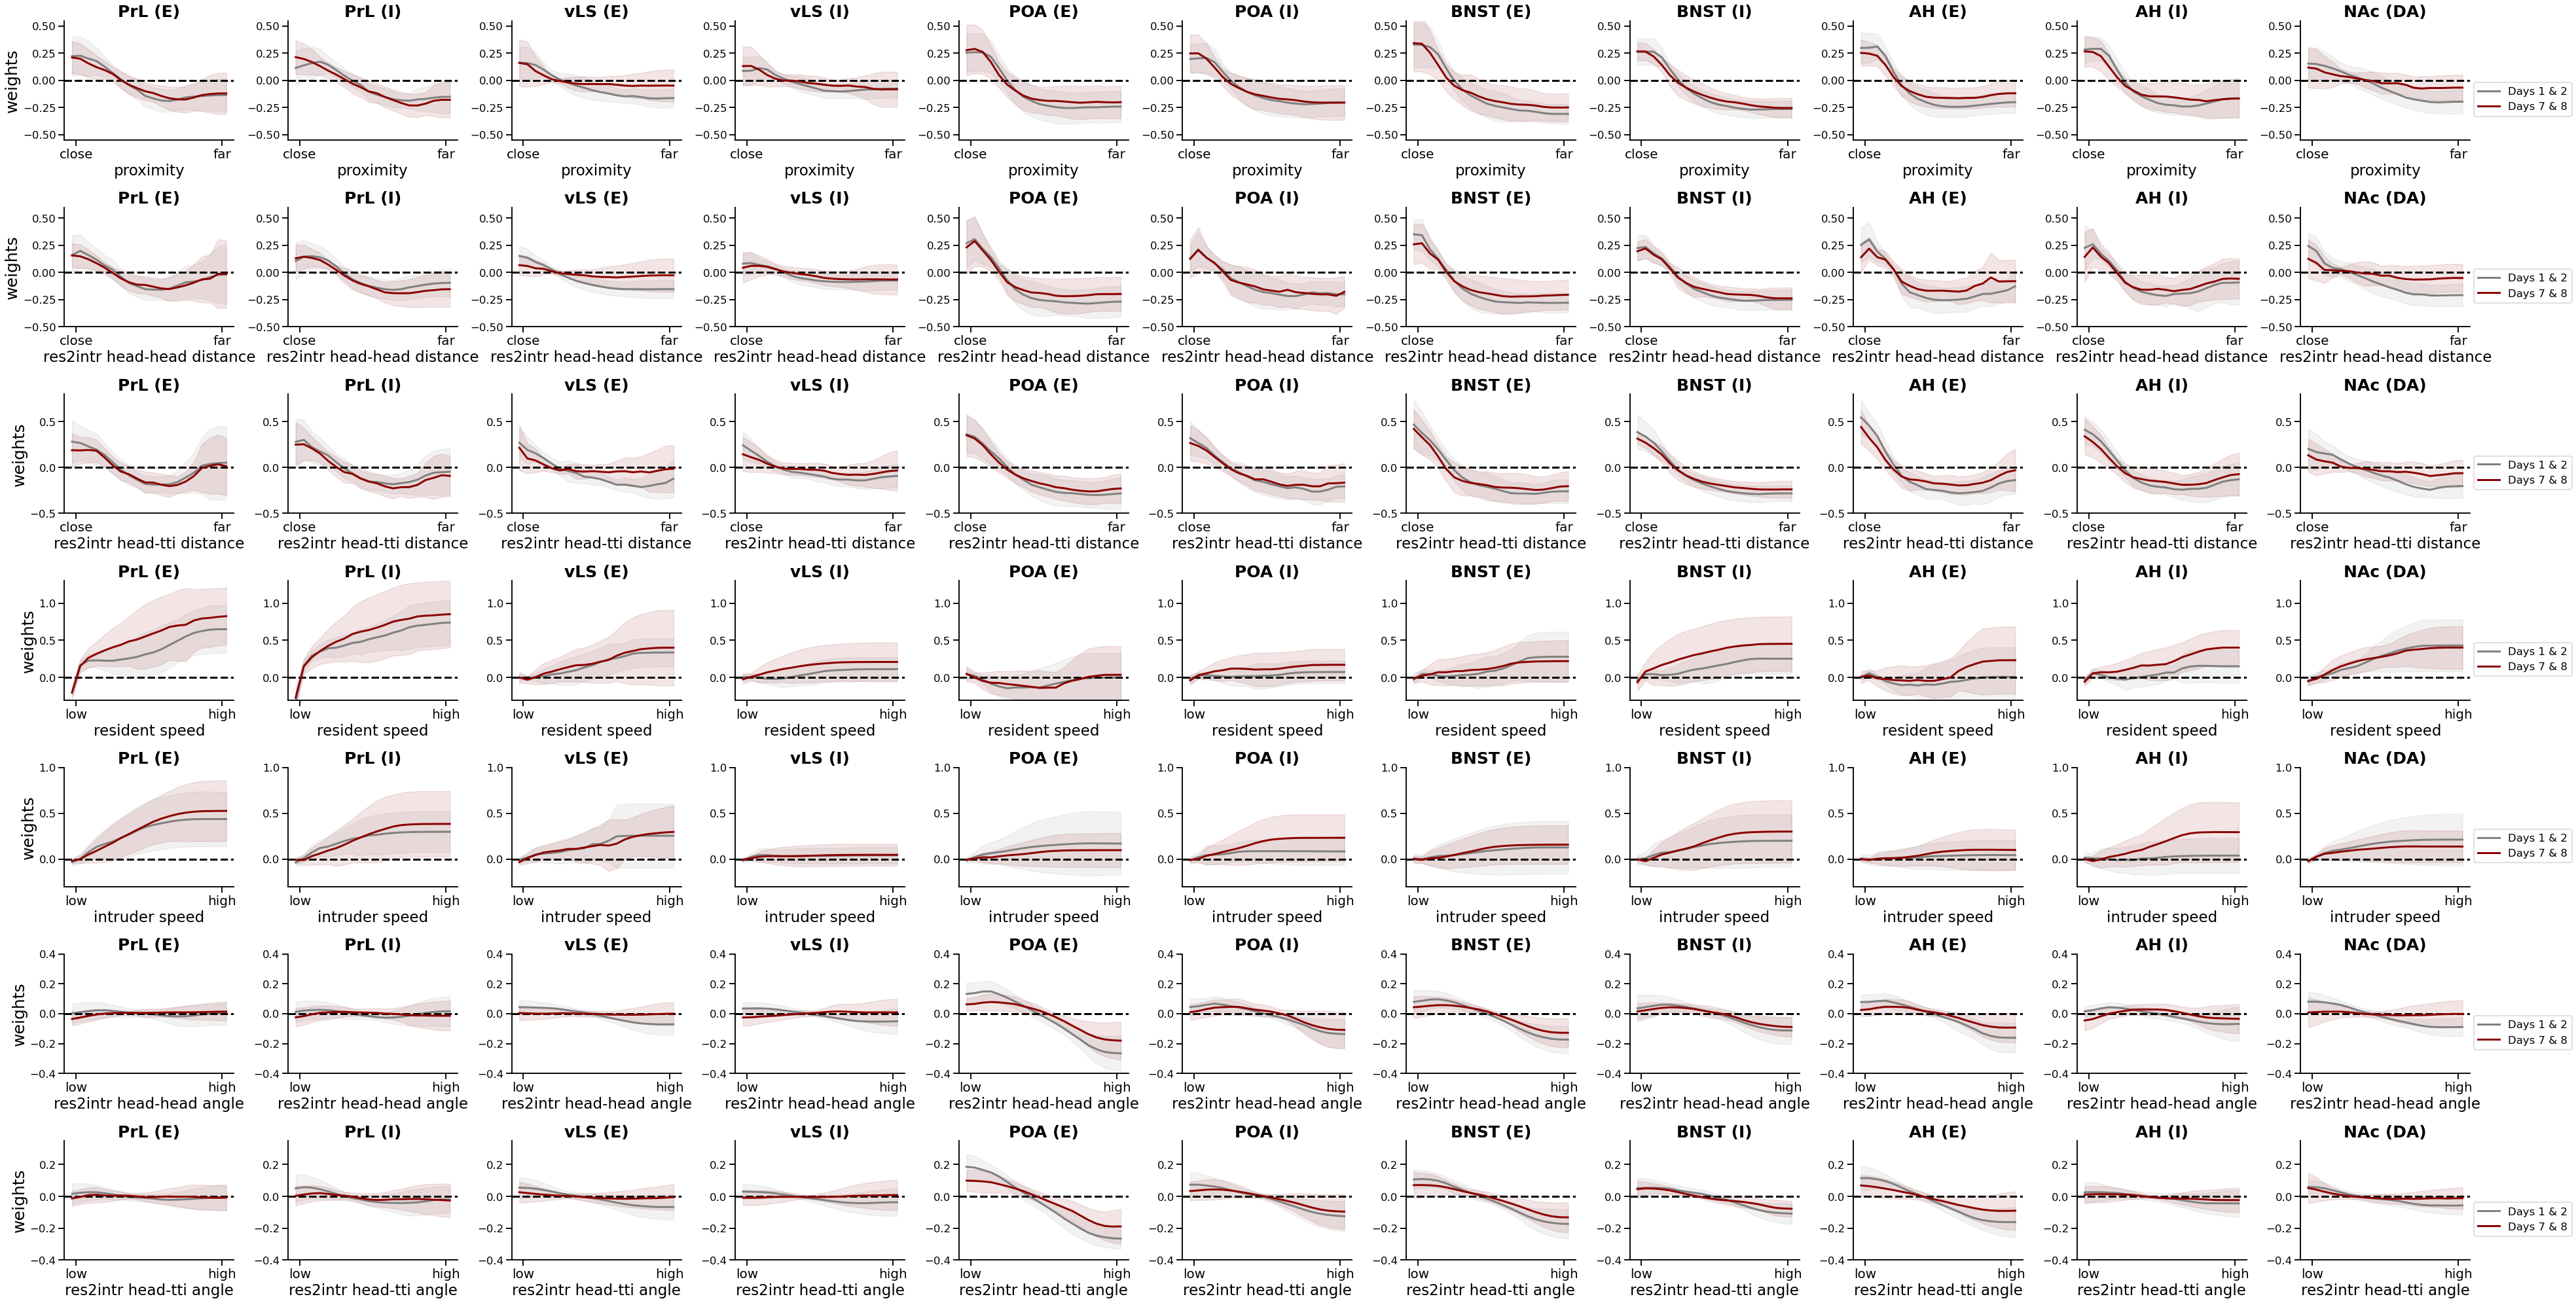

In [21]:
# regionsInterest = list(range(len(maxRegions)))
# regionsInterest = [0,2,4,6,8,10,12,14,15,17,19] # excitatory
# regionsInterest = [1,3,5,7,9,11,13,16,18,20,21] # inhibitory

# regionsInterest = [0,2,4,5,6,7,8,9,10]#,11,12,13,14,15,16,17,21]

regionsInterest = [0,1,2,3,4,5,6,7,8,9,21]
set = 1
# regionsInterest = [12,13,14,15,16,17,18,19,20,21]
# set = 2

colors={0:'gray', 6:'darkred'}


# regionsInterest = [0,1,2,34,10,12,14,17,9,11,18,21]

# featuresInterest_index = list(range(len(featuresLonglist)))
featuresInterest_index = [0,3,4,1,2,5,6]#,7,8,9]

fig, axes = plt.subplots(nrows=len(featuresInterest_index), ncols=len(regionsInterest), figsize=(5 * len(regionsInterest), 4 * len(featuresInterest_index)))
b = 0
for feature_ind in featuresInterest_index:

    c = 0
    for region_ind in regionsInterest:
        
        for Nday_ind in [0,6]: # all until last day
            axes[b,c].axhline(0, color = 'black', ls = 'dashed', linewidth=3)
            w = (weightsAllAgg_Days[:, region_ind, feature_ind, 1:, Nday_ind] + weightsAllAgg_Days[:,region_ind, feature_ind, 1:, Nday_ind+1])/2 # average across two days
            # axes[feature_ind].scatter(alpha_values[best_ind[feature_ind, Nday_ind][1]], test_mse[feature_ind, best_ind[feature_ind][0], best_ind[feature_ind][1]], color=cmapBlue.to_rgba(Nday_ind), label=f'Day {Nday_ind+1}')
            axes[b,c].plot(w.mean(axis=0), color=colors[Nday_ind], label=f'Days {Nday_ind+1} & {Nday_ind+2}', linewidth=3)
            # axes[b,c].errorbar(range(20), w.mean(axis=0), yerr=w.std(axis=0), color=colors[Nday_ind])
            axes[b,c].fill_between(range(20), w.mean(axis=0) - w.std(axis=0), w.mean(axis=0) + w.std(axis=0), alpha=0.1, color=colors[Nday_ind])#cmapRed.to_rgba(Nday_ind/1.5+4)) 
            # axes[feature_ind].plot(alpha_values, train_mse_mean,  linestyle='dashed')
            axes[b,c].set_xticks([0.5,18.5],['low','high'], size=20)
            axes[b,0].set_ylabel('weights', size=25)
            axes[b,c].set_title(maxRegions[region_ind], weight='bold', size=25)
            # axes[c].set_xticks([])
            axes[b,c].spines[['right', 'top']].set_visible(False)

        if feature_ind == 0:
            axes[b,c].set_ylim(-0.55,0.55)
            axes[b,c].set_xlabel('proximity',size=23)
            axes[b,c].set_xticks([0.5,18.5],['close','far'], size=20)
        elif feature_ind == 1:
            axes[b,c].set_ylim(-0.3,1.3)
            axes[b,c].set_xlabel('resident speed',size=23)
        elif feature_ind == 2:
            axes[b,c].set_ylim(-0.3,1)
            axes[b,c].set_xlabel('intruder speed',size=23)
        elif feature_ind == 3:
            axes[b,c].set_ylim(-0.5,0.6)
            axes[b,c].set_xlabel('res2intr head-head distance',size=23)
            axes[b,c].set_xticks([0.5,18.5],['close','far'], size=20)
        elif feature_ind == 4:
            axes[b,c].set_ylim(-0.5,0.8)
            axes[b,c].set_xlabel('res2intr head-tti distance',size=23) 
            axes[b,c].set_xticks([0.5,18.5],['close','far'], size=20)
        elif feature_ind == 5:
            axes[b,c].set_ylim(-0.4,0.4)
            axes[b,c].set_xlabel('res2intr head-head angle',size=23)
        elif feature_ind == 6:
            axes[b,c].set_ylim(-0.4,0.35)
            axes[b,c].set_xlabel('res2intr head-tti angle',size=23)
        elif feature_ind == 7:
            axes[b,c].set_ylim(-0.25,0.25)
            axes[b,c].set_xlabel('intr2res head-centroid angle',size=23)
        elif feature_ind == 8:
            axes[b,c].set_ylim(-0.5,0.8)
            axes[b,c].set_xlabel(featuresLonglist[feature_ind],size=23)
        elif feature_ind == 9:
            axes[b,c].set_ylim(-0.25,0.4)
            axes[b,c].set_xlabel(featuresLonglist[feature_ind],size=23)
        # # last day
        # axes[feature_ind].plot(W_map[feature_ind, Nday_ind][1:], color='black', label=f'Test - Day 9')
        # axes[feature_ind].set_xlabel(featuresLonglist[feature_ind])  
        c += 1 

    axes[b,-1].legend(loc=(1.02,0.2))
    b += 1
    # fig.suptitle('Aggression group: ' + featuresLonglist[feature_ind], size=25, y=1.02)
fig.tight_layout()
plt.savefig(f'../figures/TuningCurves_First-vs-Last-Days_Set={set}.png', bbox_inches='tight', dpi=400)

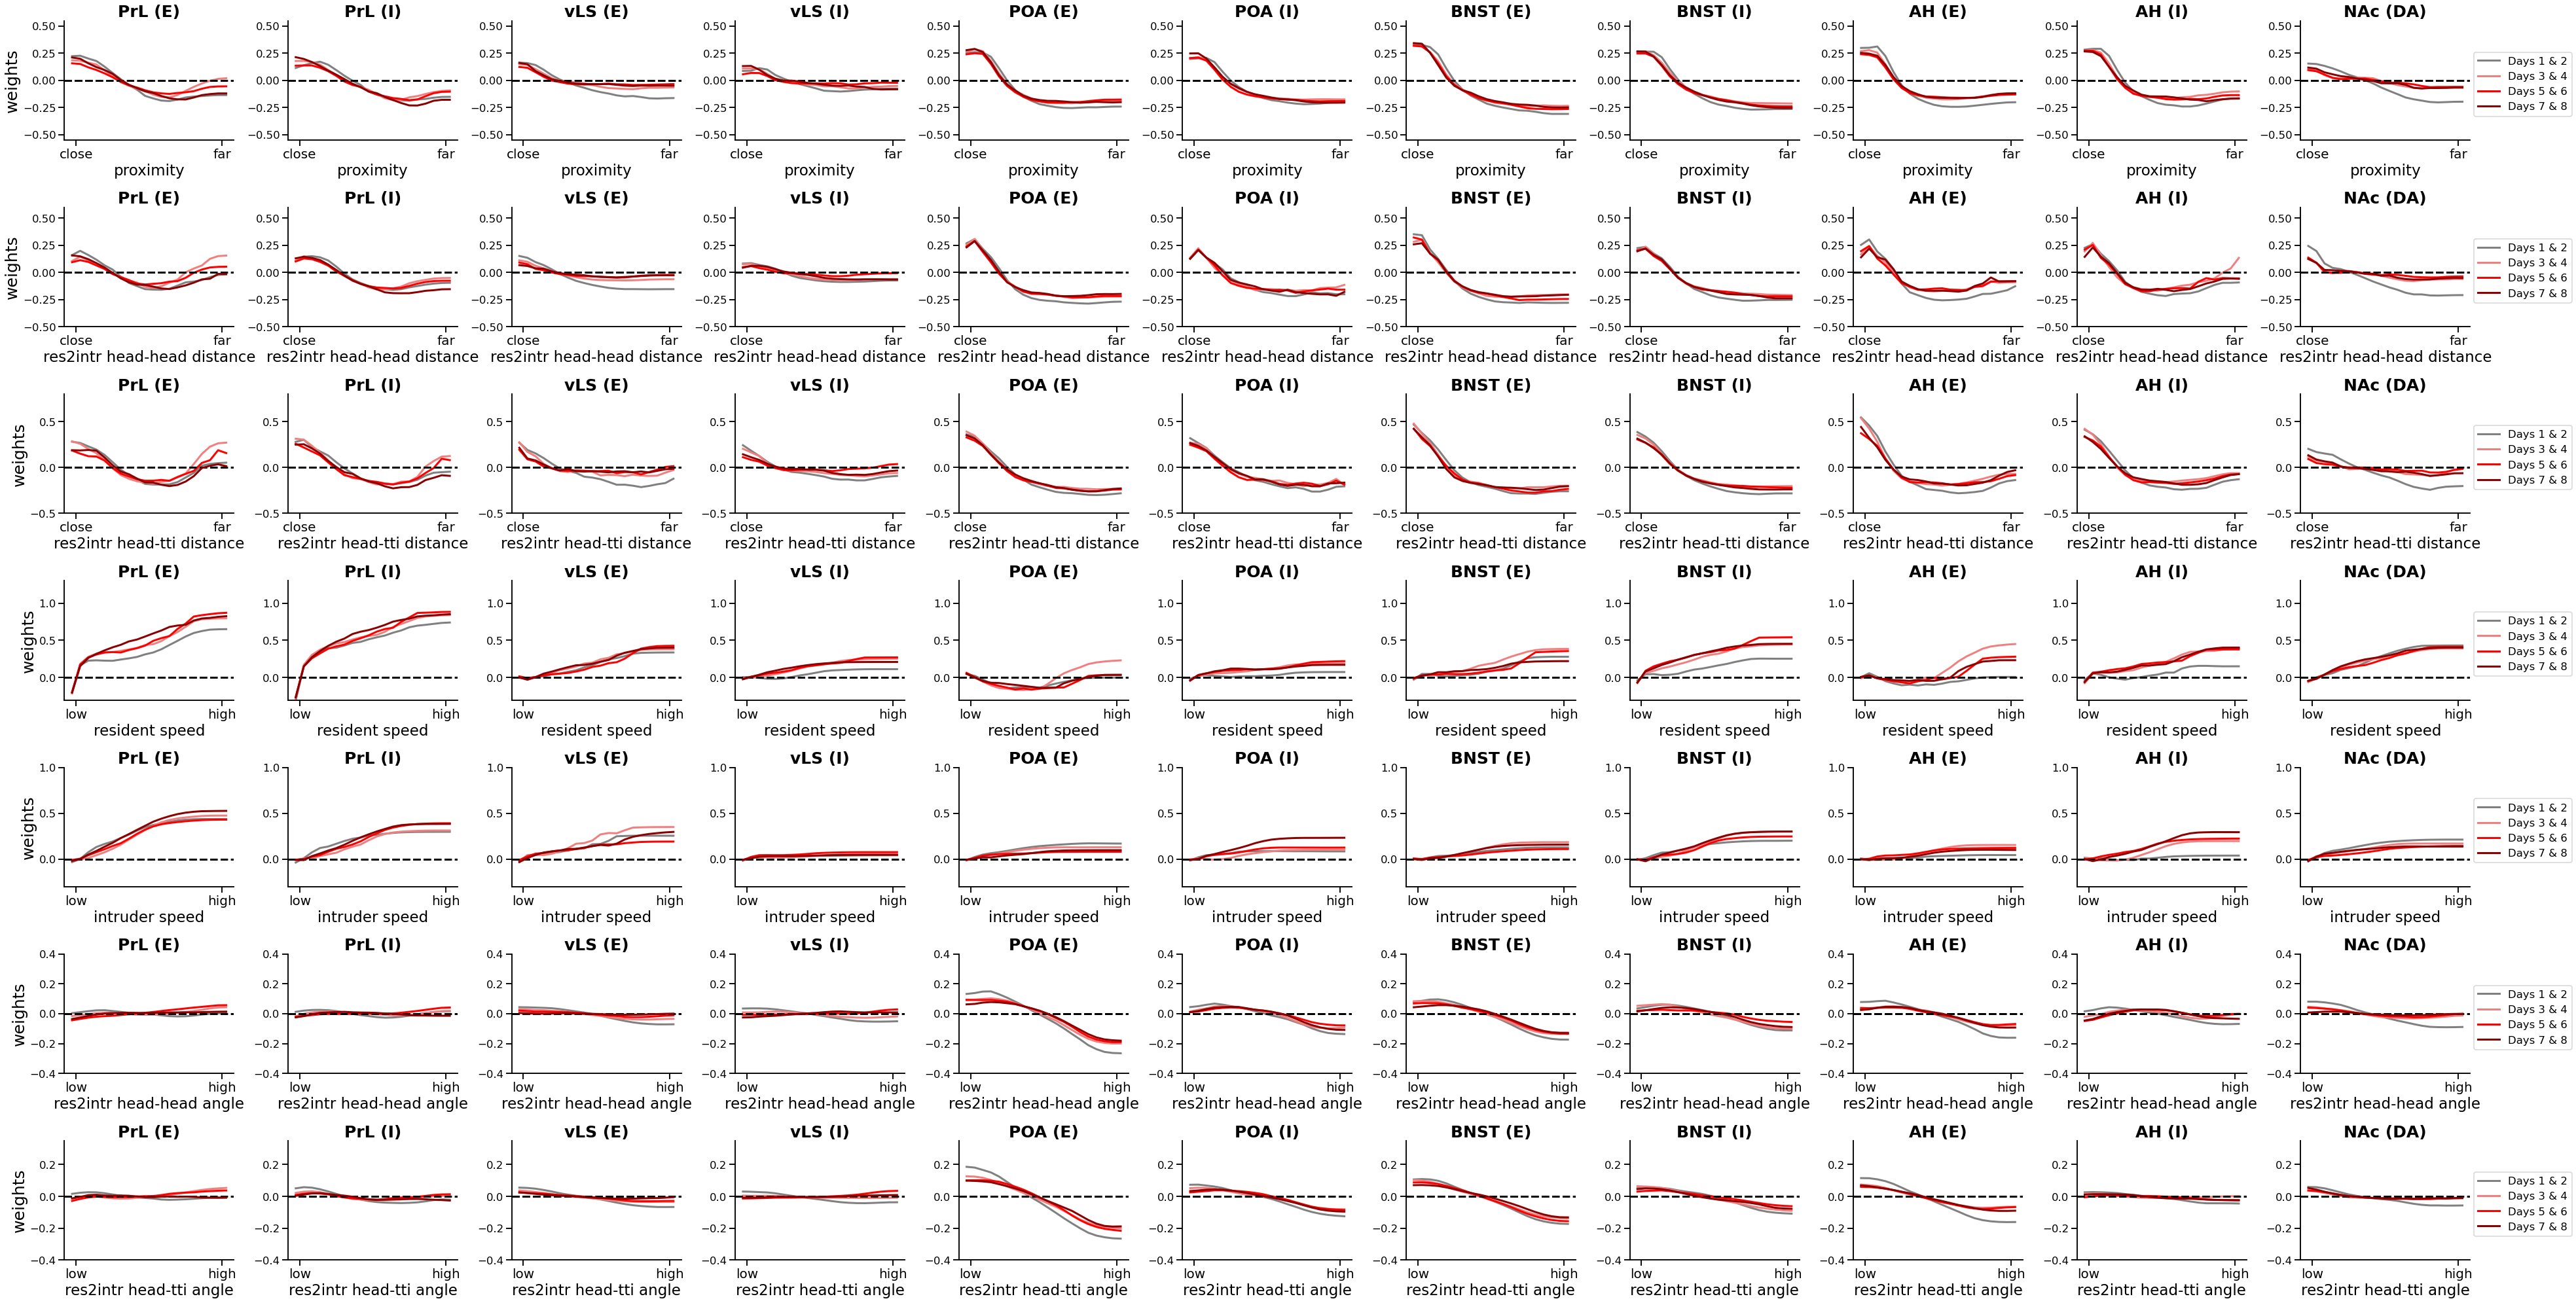

In [20]:
# regionsInterest = list(range(len(maxRegions)))
# regionsInterest = [0,2,4,6,8,10,12,14,15,17,19] # excitatory
# regionsInterest = [1,3,5,7,9,11,13,16,18,20,21] # inhibitory

# regionsInterest = [0,2,4,5,6,7,8,9,10]#,11,12,13,14,15,16,17,21]

regionsInterest = [0,1,2,3,4,5,6,7,8,9,21]
set = 1
# regionsInterest = [12,13,14,15,16,17,18,19,20,21]
# set = 2

colors={0:'gray', 2:'lightcoral', 4: 'red', 6:'darkred'}


# regionsInterest = [0,1,2,34,10,12,14,17,9,11,18,21]

# featuresInterest_index = list(range(len(featuresLonglist)))
featuresInterest_index = [0,3,4,1,2,5,6]#,7,8,9]

fig, axes = plt.subplots(nrows=len(featuresInterest_index), ncols=len(regionsInterest), figsize=(5 * len(regionsInterest), 4 * len(featuresInterest_index)))
b = 0
for feature_ind in featuresInterest_index:

    c = 0
    for region_ind in regionsInterest:
        
        for Nday_ind in [0,2,4,6]: # all until last day
            axes[b,c].axhline(0, color = 'black', ls = 'dashed', linewidth=3)
            w = (weightsAllAgg_Days[:, region_ind, feature_ind, 1:, Nday_ind] + weightsAllAgg_Days[:,region_ind, feature_ind, 1:, Nday_ind+1])/2 # average across two days
            # axes[feature_ind].scatter(alpha_values[best_ind[feature_ind, Nday_ind][1]], test_mse[feature_ind, best_ind[feature_ind][0], best_ind[feature_ind][1]], color=cmapBlue.to_rgba(Nday_ind), label=f'Day {Nday_ind+1}')
            axes[b,c].plot(w.mean(axis=0), color=colors[Nday_ind], label=f'Days {Nday_ind+1} & {Nday_ind+2}', linewidth=3)
            # axes[b,c].errorbar(range(20), w.mean(axis=0), yerr=w.std(axis=0), color=colors[Nday_ind])
            # axes[b,c].fill_between(range(20), w.mean(axis=0) - w.std(axis=0), w.mean(axis=0) + w.std(axis=0), alpha=0.1, color=colors[Nday_ind])#cmapRed.to_rgba(Nday_ind/1.5+4)) 
            # axes[feature_ind].plot(alpha_values, train_mse_mean,  linestyle='dashed')
            axes[b,c].set_xticks([0.5,18.5],['low','high'], size=20)
            axes[b,0].set_ylabel('weights', size=25)
            axes[b,c].set_title(maxRegions[region_ind], weight='bold', size=25)
            # axes[c].set_xticks([])
            axes[b,c].spines[['right', 'top']].set_visible(False)

        if feature_ind == 0:
            axes[b,c].set_ylim(-0.55,0.55)
            axes[b,c].set_xlabel('proximity',size=23)
            axes[b,c].set_xticks([0.5,18.5],['close','far'], size=20)
        elif feature_ind == 1:
            axes[b,c].set_ylim(-0.3,1.3)
            axes[b,c].set_xlabel('resident speed',size=23)
        elif feature_ind == 2:
            axes[b,c].set_ylim(-0.3,1)
            axes[b,c].set_xlabel('intruder speed',size=23)
        elif feature_ind == 3:
            axes[b,c].set_ylim(-0.5,0.6)
            axes[b,c].set_xlabel('res2intr head-head distance',size=23)
            axes[b,c].set_xticks([0.5,18.5],['close','far'], size=20)
        elif feature_ind == 4:
            axes[b,c].set_ylim(-0.5,0.8)
            axes[b,c].set_xlabel('res2intr head-tti distance',size=23) 
            axes[b,c].set_xticks([0.5,18.5],['close','far'], size=20)
        elif feature_ind == 5:
            axes[b,c].set_ylim(-0.4,0.4)
            axes[b,c].set_xlabel('res2intr head-head angle',size=23)
        elif feature_ind == 6:
            axes[b,c].set_ylim(-0.4,0.35)
            axes[b,c].set_xlabel('res2intr head-tti angle',size=23)
        elif feature_ind == 7:
            axes[b,c].set_ylim(-0.25,0.25)
            axes[b,c].set_xlabel('intr2res head-centroid angle',size=23)
        elif feature_ind == 8:
            axes[b,c].set_ylim(-0.5,0.8)
            axes[b,c].set_xlabel(featuresLonglist[feature_ind],size=23)
        elif feature_ind == 9:
            axes[b,c].set_ylim(-0.25,0.4)
            axes[b,c].set_xlabel(featuresLonglist[feature_ind],size=23)
        # # last day
        # axes[feature_ind].plot(W_map[feature_ind, Nday_ind][1:], color='black', label=f'Test - Day 9')
        # axes[feature_ind].set_xlabel(featuresLonglist[feature_ind])  
        c += 1 

    axes[b,-1].legend(loc=(1.02,0.2))
    b += 1
    # fig.suptitle('Aggression group: ' + featuresLonglist[feature_ind], size=25, y=1.02)
fig.tight_layout()
# plt.savefig(f'../figures/TuningCurves_First-vs-Last-Days_Set={set}.png', bbox_inches='tight', dpi=400)

In [201]:
# featuresInterest_index = list(range(len(featuresLonglist)))
# for region_ind in range(len(maxRegions)):

#     fig, axes = plt.subplots(nrows=1, ncols=len(featuresInterest_index), figsize=(7 * len(featuresInterest_index), 5))

#     for feature_ind in featuresInterest_index:

#         for Nday_ind in [0,2,4,6]: # all until last day
#             w = (meanWeightsAgg_Days[region_ind, feature_ind, 1:, Nday_ind] + meanWeightsAgg_Days[region_ind, feature_ind, 1:, Nday_ind+1])/2
#             # axes[feature_ind].scatter(alpha_values[best_ind[feature_ind, Nday_ind][1]], test_mse[feature_ind, best_ind[feature_ind][0], best_ind[feature_ind][1]], color=cmapBlue.to_rgba(Nday_ind), label=f'Day {Nday_ind+1}')
#             axes[feature_ind].plot(w, color=cmapBlue.to_rgba(1.3*Nday_ind+2), label=f'Days {Nday_ind+1} & {Nday_ind+2}')
#             # axes[feature_ind].plot(alpha_values, train_mse_mean,  linestyle='dashed')
#             axes[feature_ind].set_xlabel(featuresLonglist[feature_ind])
        
#         # # last day
#         # axes[feature_ind].plot(W_map[feature_ind, Nday_ind][1:], color='black', label=f'Test - Day 9')
#         # axes[feature_ind].set_xlabel(featuresLonglist[feature_ind])   
         

#     axes[-1].legend(loc=(1.02,0.2))
#     fig.suptitle('Agg group: ' + str(maxRegions[region_ind]), size=25, y=1.02)
#     plt.show()

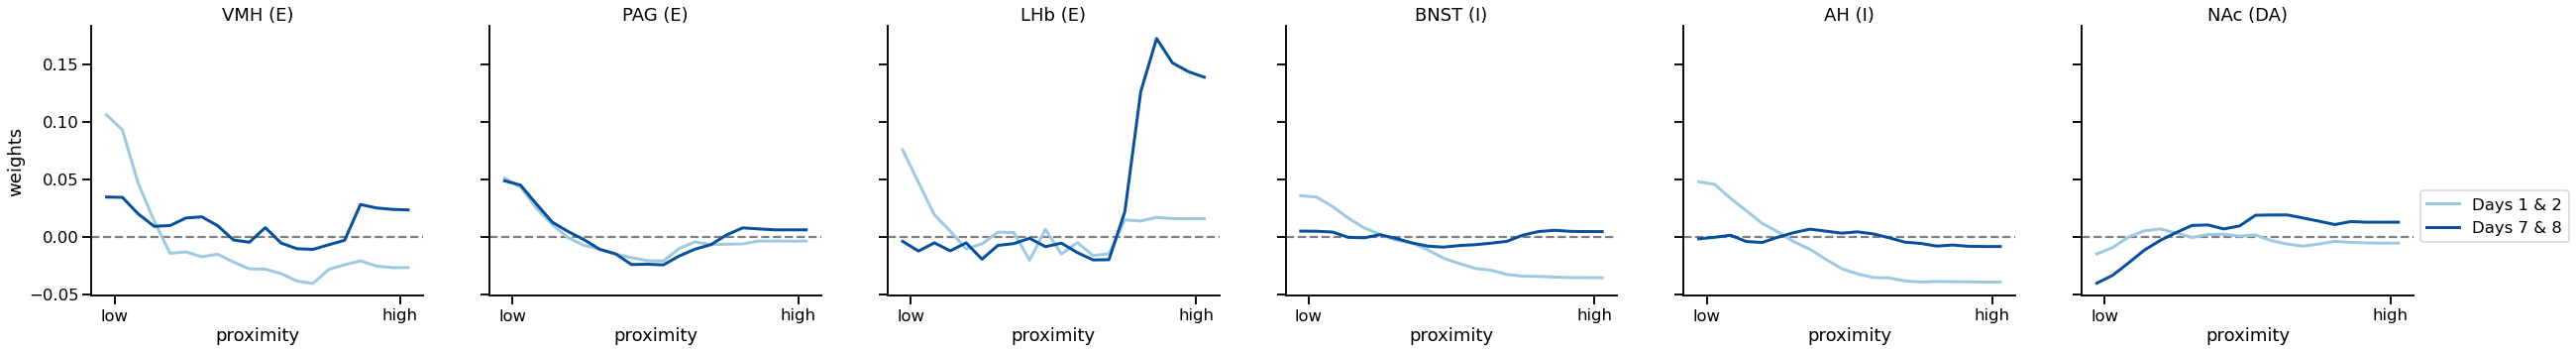

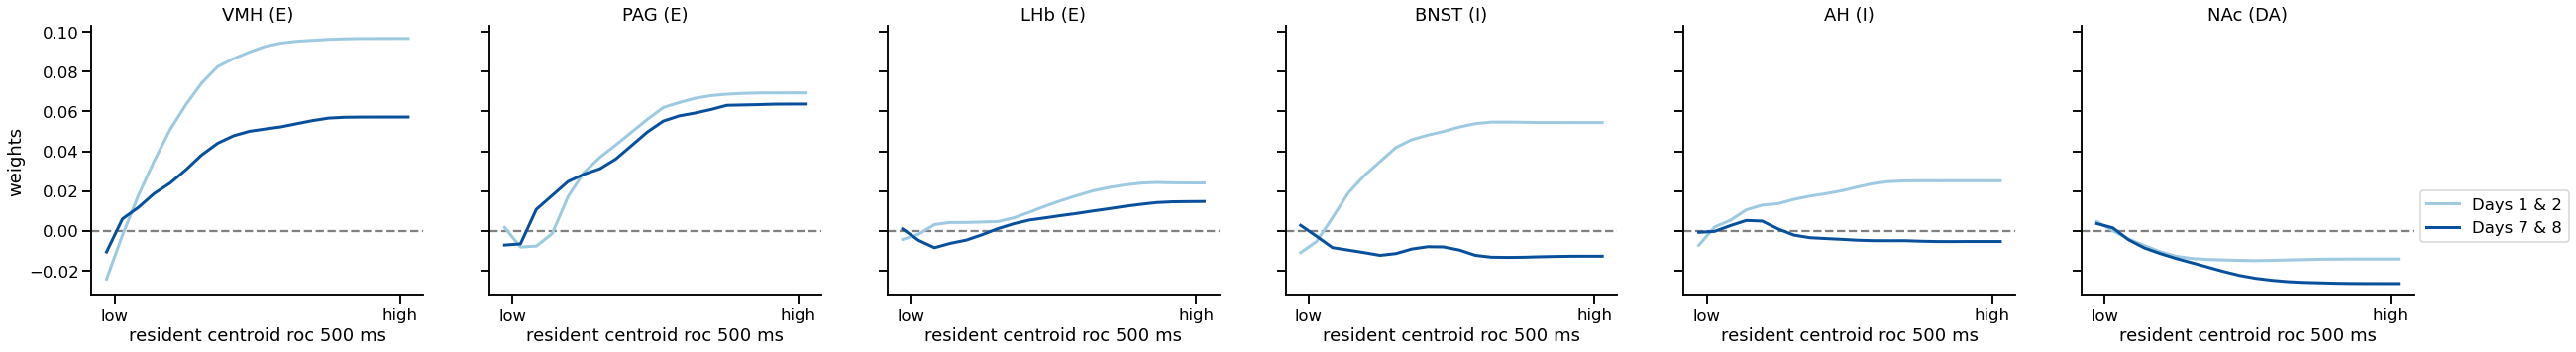

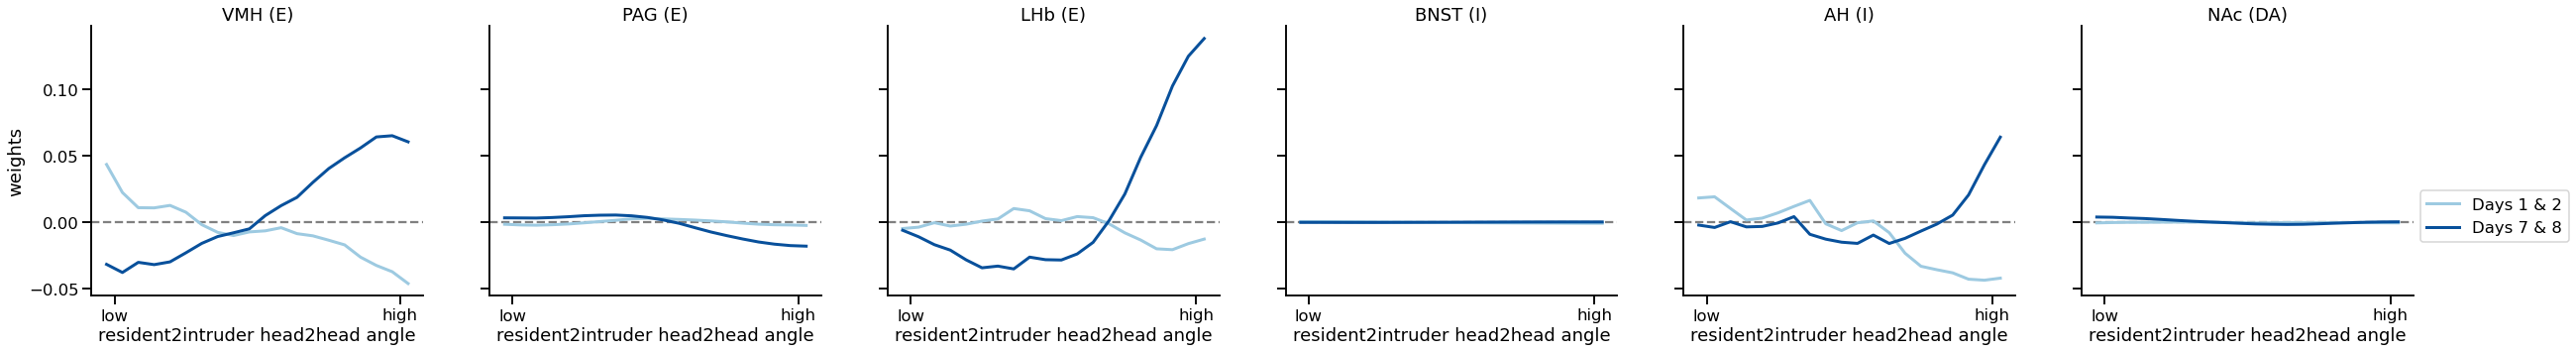

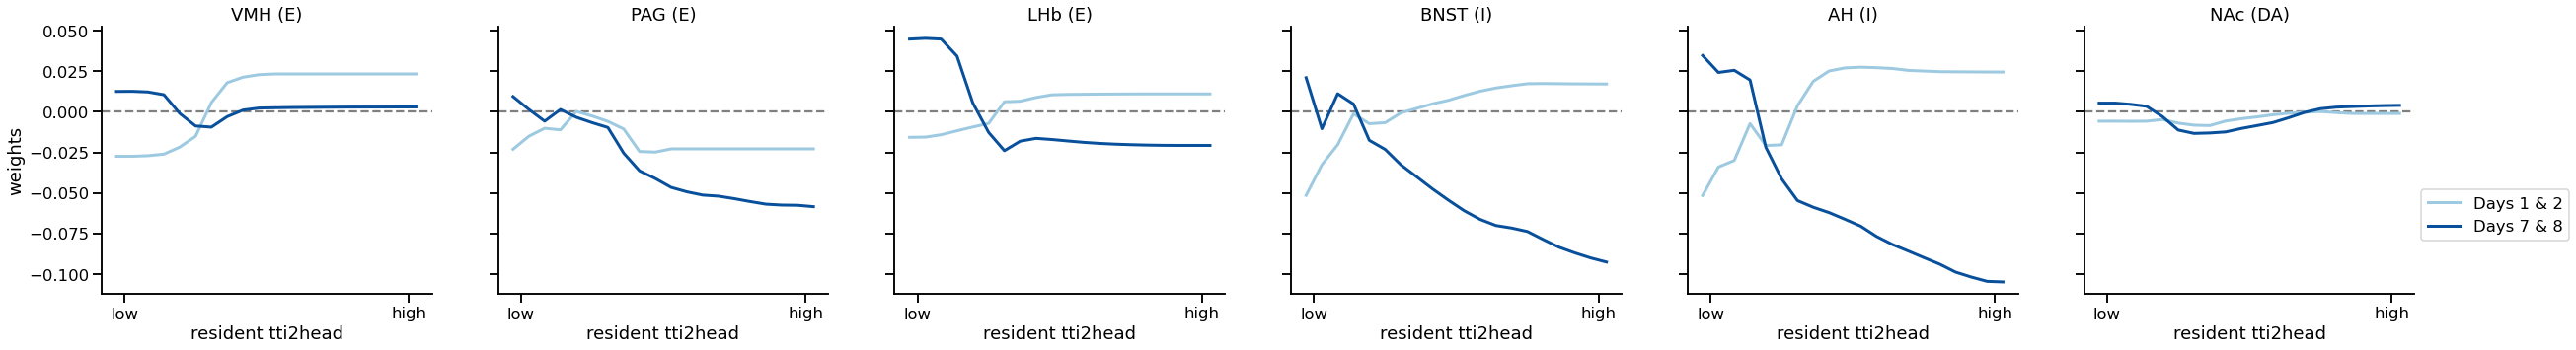

In [229]:
# regionsInterest = list(range(len(maxRegions)))
regionsInterest = [0,2,4,6,8,10,12,14,15,17,19] # excitatory
# regionsInterest = [1,3,5,7,9,11,13,16,18,20,21] # inhibitory

# regionsInterest = [0,12,14,17,7,9,21]
regionsInterest = [12,14,17,7,9,21]

featuresInterest_index = [0,1,5,8]

for feature_ind in featuresInterest_index:

    fig, axes = plt.subplots(nrows=1, ncols=len(regionsInterest), figsize=(7 * len(regionsInterest), 5), sharey=True)

    c = 0
    for region_ind in regionsInterest:
        
        axes[c].axhline(0, color = 'gray', ls = 'dashed')
        for Nday_ind in [0,6]: # all until last day
            w = (meanWeightsObs_Days[region_ind, feature_ind, 1:, Nday_ind] + meanWeightsObs_Days[region_ind, feature_ind, 1:, Nday_ind+1])/2
            # axes[feature_ind].scatter(alpha_values[best_ind[feature_ind, Nday_ind][1]], test_mse[feature_ind, best_ind[feature_ind][0], best_ind[feature_ind][1]], color=cmapBlue.to_rgba(Nday_ind), label=f'Day {Nday_ind+1}')
            axes[c].plot(w, color=cmapBlue.to_rgba(Nday_ind/1.5+4), label=f'Days {Nday_ind+1} & {Nday_ind+2}', linewidth=3)
            # axes[feature_ind].plot(alpha_values, train_mse_mean,  linestyle='dashed')
            axes[c].set_xticks([0.5,18.5],['low','high'])
            axes[0].set_ylabel('weights')
            axes[c].set_xlabel(featuresLonglist[feature_ind])
            axes[c].set_title(maxRegions[region_ind])
            # axes[c].set_xticks([])
            axes[c].spines[['right', 'top']].set_visible(False)

            # if feature_ind == 0:
            #     axes[c].set_ylim(-0.5,0.5)
            # elif feature_ind == 1:
            #     axes[c].set_ylim(-0.2,1.1)
            # elif feature_ind == 5:
            #     axes[c].set_ylim(-0.3,0.4)
            # elif feature_ind == 8:
            #     axes[c].set_ylim(-0.5,0.7)
        # # last day
        # axes[feature_ind].plot(W_map[feature_ind, Nday_ind][1:], color='black', label=f'Test - Day 9')
        # axes[feature_ind].set_xlabel(featuresLonglist[feature_ind])  
        c += 1 

            
            

    axes[-1].legend(loc=(1.02,0.2))
    # fig.suptitle('Aggression group: ' + featuresLonglist[feature_ind], size=25, y=1.02)
    plt.show()